In [1]:
import pandas as pd
import sys, os, importlib
from datetime import datetime

In [2]:
pd.set_option('display.max_rows', 100)

if os.path.join('..','0_funcoes_base') not in sys.path:
    sys.path.append(os.path.join('..','0_funcoes_base')) 

df_manipulator = importlib.import_module('df_manipulator')
date_manipulator = importlib.import_module('date_manipulator')
plot_manipulator = importlib.import_module('plot_manipulator')

In [3]:
input_config = {
    'ref_dir':'../../1_dados_raw/',
    'filename':'export_lunar_20200517.csv',
    'delimiter': ';',
    'header': ['id', 'speedBumpId','timestamp','x','y','z','lat','lng']
}

out_config = {
    'ref_dir': './out',
    'delimiter':';',
    'with_header': True,
}

## Funções

In [4]:
def remove_invalid_timestamps(df):
    df = df_manipulator.filter_by_dates(df, start_date='2000-01-01', end_date=datetime.utcnow(), format='%Y-%m-%d')
    return df

def update_index_df(df):
    df['new_timestamp'] = df.apply(lambda row: date_manipulator.ticks_to_datetime(row.timestamp), axis=1)

    df = df_manipulator.remove_column(df, 'timestamp', False)
    df.rename(columns={'new_timestamp':'timestamp'},inplace=True)

    df_manipulator.set_index(df, 'timestamp', True)
    df_filtered.sort_index(inplace=True)

    return df

def get_out_filename():
    return os.path.join(out_config['ref_dir'], '1_' + input_config['filename'])

## Carrega dataframe bruto

In [5]:
df = df_manipulator.load_dataframe(input_config['filename'], input_config['ref_dir'], input_config['delimiter'], input_config['header'])

## Dataframe bruto

In [6]:
df

id  speedBumpId      timestamp  \
0      d198e52b-bd5b-424a-8ea5-d391fbdb7b20            0  1589757048346   
1      a9df8305-e4ed-4530-ab78-e1aa3ca9ffbd            0  1589757048543   
2      74dedc33-8d9b-4aa6-a352-df1ee9364ed7            0  1589757048743   
3      4a64f1bf-ea98-49db-baff-d7d08baf2dce            0  1589757048843   
4      25a3976b-a812-4bf2-a2fe-113d7b01cd11            0  1589757048944   
...                                     ...          ...            ...   
11131  0f15d4aa-c4c3-40ba-9d1f-1746e938a5eb            0  1589758551161   
11132  c044a484-bb8b-421b-8cc8-a6ad4713e28f            0  1589758551261   
11133  c9d94f9a-6211-4198-b39b-70db0ef2e890            0  1589758551361   
11134  2fa87037-71b8-42e0-bd89-64bff33cfead            0  1589758551461   
11135  1c157063-30f5-428a-9690-022951e7315b            0  1589758551561   

              x          y         z        lat        lng  
0     -3.399200   9.516205  1.573975 -22.921991 -42.473372  
1     -2.987396  10.203339  1.291458 -22.921991 -42.473372  
2     -4.376038   9.746048  1.806213 -22.921991 -42.473372  
3     -3.698471   9.317490  1.849304 -22.921991 -42.473372  
4     -5.039230   9.372559  0.522919 -22.921991 -42.473372  
...         ...        ...       ...        ...        ...  
11131  0.386032  10.105179  1.660172 -22.925816 -42.484631  
11132 -1.378494   9.920822  2.608276 -22.925816 -42.484631  
11133 -1.215683   9.523392  2.505325 -22.925816 -42.484631  
11134 -0.435181   8.999054  2.871628 -22.925816 -42.484631  
11135 -0.969086   9.212143  0.702484 -22.925816 -42.484631  

[11136 rows x 8 columns]

## Detalhes do dataframe bruto

In [7]:
df_manipulator.apply_describe(df)

Shape:
 (11136, 8)
Types:

float64 :  ['x' 'y' 'z' 'lat' 'lng']
int64 :  ['speedBumpId' 'timestamp']
object :  ['id']





null_sum  null_pct   dtypes  count          mean        median  \
id                  0       0.0   object  11136           NaN           NaN   
lat                 0       0.0  float64  11136 -2.291595e+01 -2.291711e+01   
lng                 0       0.0  float64  11136 -4.247970e+01 -4.247697e+01   
speedBumpId         0       0.0    int64  11136  5.567529e-03  0.000000e+00   
timestamp           0       0.0    int64  11136  1.589758e+12  1.589758e+12   
x                   0       0.0  float64  11136 -6.641728e-01 -6.338959e-01   
y                   0       0.0  float64  11136  9.331052e+00  9.379730e+00   
z                   0       0.0  float64  11136  2.894415e+00  2.696854e+00   

                                              min  \
id           0000103f-58f2-4b67-956e-9fc49ea2a845   
lat                                      -22.9355   
lng                                      -42.4957   
speedBumpId                                     0   
timestamp                           1589757048346   
x                                        -12.7126   
y                                         3.04707   
z                                        -8.12733   

                                              max  
id           ffe9ed07-2030-4a2d-ad61-18af6217f012  
lat                                      -22.8901  
lng                                      -42.4683  
speedBumpId                                     2  
timestamp                           1589758551561  
x                                         5.52878  
y                                         15.6933  
z                                         15.8889

## Remove NaN

In [8]:
df_filtered = df_manipulator.remove_nan(df)

## Remove timestamp inválido

In [9]:
df_filtered = update_index_df(df_filtered)

In [10]:
df_filtered = remove_invalid_timestamps(df_filtered)

## Dataframe filtrado

In [11]:
df_filtered

id  speedBumpId  \
timestamp                                                                    
2020-05-17 20:10:48.346  d198e52b-bd5b-424a-8ea5-d391fbdb7b20            0   
2020-05-17 20:10:48.543  a9df8305-e4ed-4530-ab78-e1aa3ca9ffbd            0   
2020-05-17 20:10:48.743  74dedc33-8d9b-4aa6-a352-df1ee9364ed7            0   
2020-05-17 20:10:48.843  4a64f1bf-ea98-49db-baff-d7d08baf2dce            0   
2020-05-17 20:10:48.944  25a3976b-a812-4bf2-a2fe-113d7b01cd11            0   
...                                                       ...          ...   
2020-05-17 20:35:51.161  0f15d4aa-c4c3-40ba-9d1f-1746e938a5eb            0   
2020-05-17 20:35:51.261  c044a484-bb8b-421b-8cc8-a6ad4713e28f            0   
2020-05-17 20:35:51.361  c9d94f9a-6211-4198-b39b-70db0ef2e890            0   
2020-05-17 20:35:51.461  2fa87037-71b8-42e0-bd89-64bff33cfead            0   
2020-05-17 20:35:51.561  1c157063-30f5-428a-9690-022951e7315b            0   

                                x          y         z        lat        lng  
timestamp                                                                     
2020-05-17 20:10:48.346 -3.399200   9.516205  1.573975 -22.921991 -42.473372  
2020-05-17 20:10:48.543 -2.987396  10.203339  1.291458 -22.921991 -42.473372  
2020-05-17 20:10:48.743 -4.376038   9.746048  1.806213 -22.921991 -42.473372  
2020-05-17 20:10:48.843 -3.698471   9.317490  1.849304 -22.921991 -42.473372  
2020-05-17 20:10:48.944 -5.039230   9.372559  0.522919 -22.921991 -42.473372  
...                           ...        ...       ...        ...        ...  
2020-05-17 20:35:51.161  0.386032  10.105179  1.660172 -22.925816 -42.484631  
2020-05-17 20:35:51.261 -1.378494   9.920822  2.608276 -22.925816 -42.484631  
2020-05-17 20:35:51.361 -1.215683   9.523392  2.505325 -22.925816 -42.484631  
2020-05-17 20:35:51.461 -0.435181   8.999054  2.871628 -22.925816 -42.484631  
2020-05-17 20:35:51.561 -0.969086   9.212143  0.702484 -22.925816 -42.484631  

[11136 rows x 7 columns]

## Detalhes do dataframe filtrado

In [12]:
df_manipulator.apply_describe(df_filtered)

Shape:
 (11136, 7)
Types:

float64 :  ['x' 'y' 'z' 'lat' 'lng']
object :  ['id']
int64 :  ['speedBumpId']





null_sum  null_pct   dtypes  count       mean     median  \
id                  0       0.0   object  11136        NaN        NaN   
lat                 0       0.0  float64  11136 -22.915948 -22.917111   
lng                 0       0.0  float64  11136 -42.479702 -42.476972   
speedBumpId         0       0.0    int64  11136   0.005568   0.000000   
x                   0       0.0  float64  11136  -0.664173  -0.633896   
y                   0       0.0  float64  11136   9.331052   9.379730   
z                   0       0.0  float64  11136   2.894415   2.696854   

                                              min  \
id           0000103f-58f2-4b67-956e-9fc49ea2a845   
lat                                      -22.9355   
lng                                      -42.4957   
speedBumpId                                     0   
x                                        -12.7126   
y                                         3.04707   
z                                        -8.12733   

                                              max  
id           ffe9ed07-2030-4a2d-ad61-18af6217f012  
lat                                      -22.8901  
lng                                      -42.4683  
speedBumpId                                     2  
x                                         5.52878  
y                                         15.6933  
z                                         15.8889

## Salva o dataframe de saída

In [17]:
df_filtered2 = df_filtered[df_filtered.speedBumpId > 0]

In [25]:
import geopandas
import matplotlib.pyplot as plt

In [21]:
gdf = geopandas.GeoDataFrame(
    df_filtered2, geometry=geopandas.points_from_xy(df_filtered2.lng, df_filtered2.lat))

In [45]:
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

for city in cities['name']:
    if 'rio' in city.lower():
        print(city)

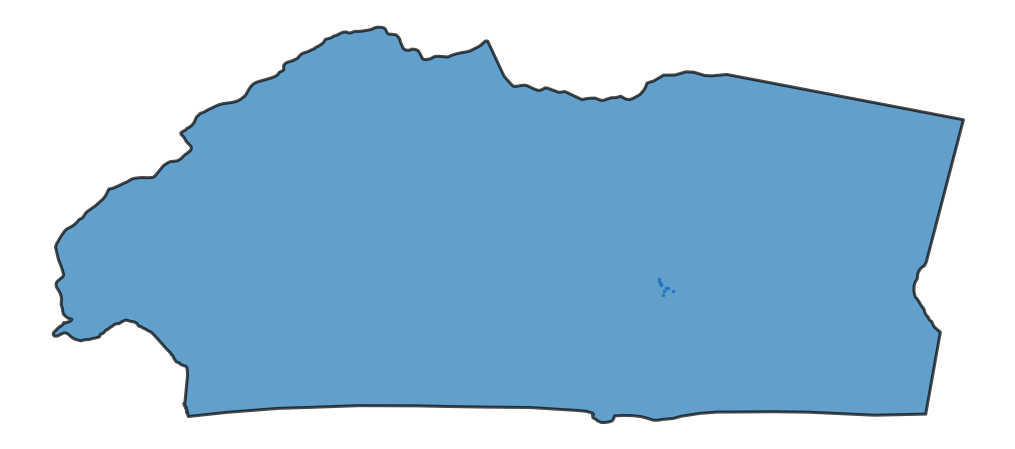

In [79]:
rj = geopandas.read_file('../../1_dados_raw/33MUE250GC_SIR.shp')

rj = rj[rj.NM_MUNICIP == 'SAQUAREMA']

# We restrict to South America.
ax = rj.plot(color='white', figsize=(30,8))

# ax = novo_df.plot(figsize=(50,50), color = '#ecedee', edgecolor = 'darkblue', linewidth= 0.1)

ax.axis('off')
gdf[gdf.speedBumpId == 1].plot(markersize=6, alpha=0, color= '#ecedee', ax=ax)
gdf[gdf.speedBumpId == 2].plot(markersize=6, alpha=1.0, color='#2b74f2', ax=ax)

# We can now plot our ``GeoDataFrame``.
rj.plot(ax=ax, edgecolor='black', linewidth=3, alpha=0.7)

plt.show()

In [13]:
out_filename = get_out_filename()
df_filtered.to_csv(out_filename, sep=out_config['delimiter'], header=out_config['with_header'])
print(f'O arquivo {out_filename} foi gerado!')

O arquivo ./out/1_export_lunar_20200514.csv foi gerado!


In [27]:
special_dates = []
for event_time in df_filtered[df_filtered.is_speedbump == True].index.to_list():
    event_datetime = event_time.to_pydatetime()
    start_date = event_datetime - pd.Timedelta(seconds=10)
    end_date = event_datetime + pd.Timedelta(seconds=10)
    special_dates.append({'event_time':event_datetime.strftime('%d/%m/%Y %H:%M:%S.%f'), 'start_date':start_date.strftime('%d/%m/%Y %H:%M:%S.%f'), 'end_date':end_date.strftime('%d/%m/%Y %H:%M:%S.%f')})
    #special_dates[event_time.to_pydatetime().strftime('%d/%m/%Y %H:%M:%S.%f')] = 'Event'


13052020221252
Shape: (42, 7)


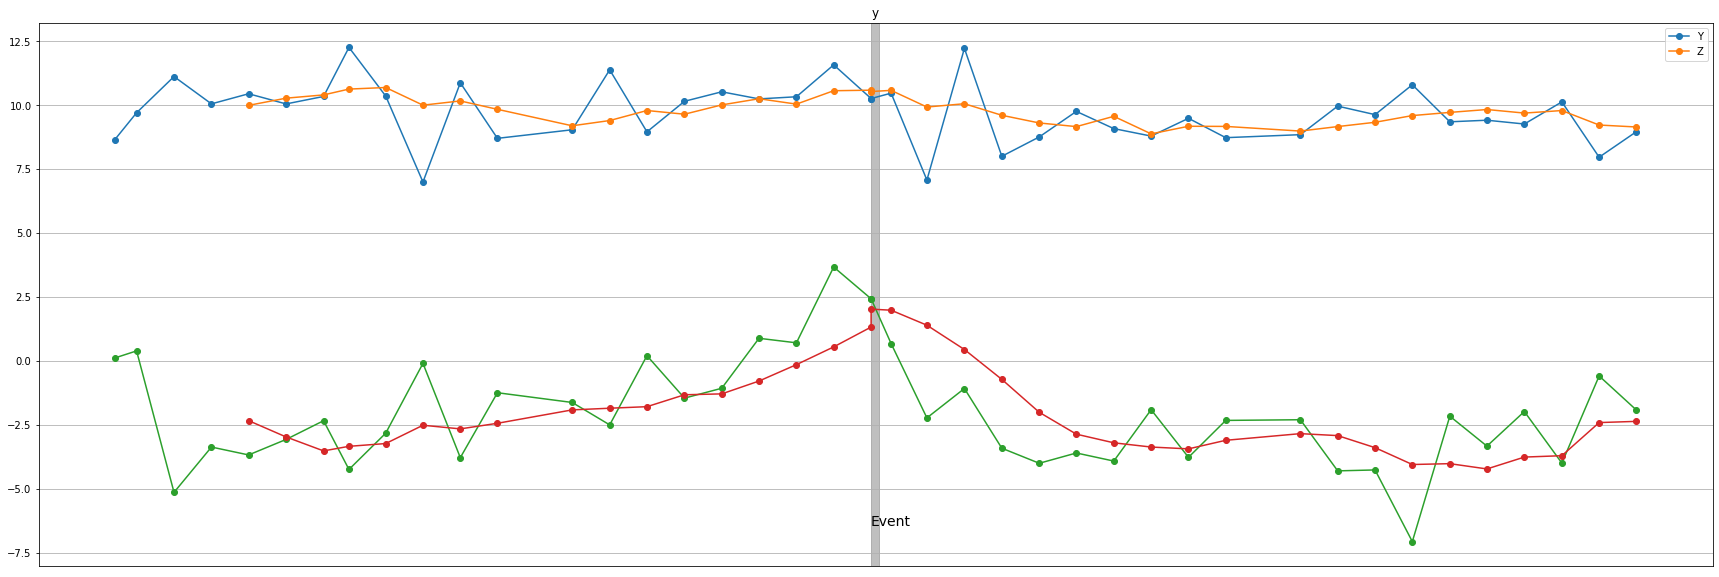

13052020221447
Shape: (35, 7)


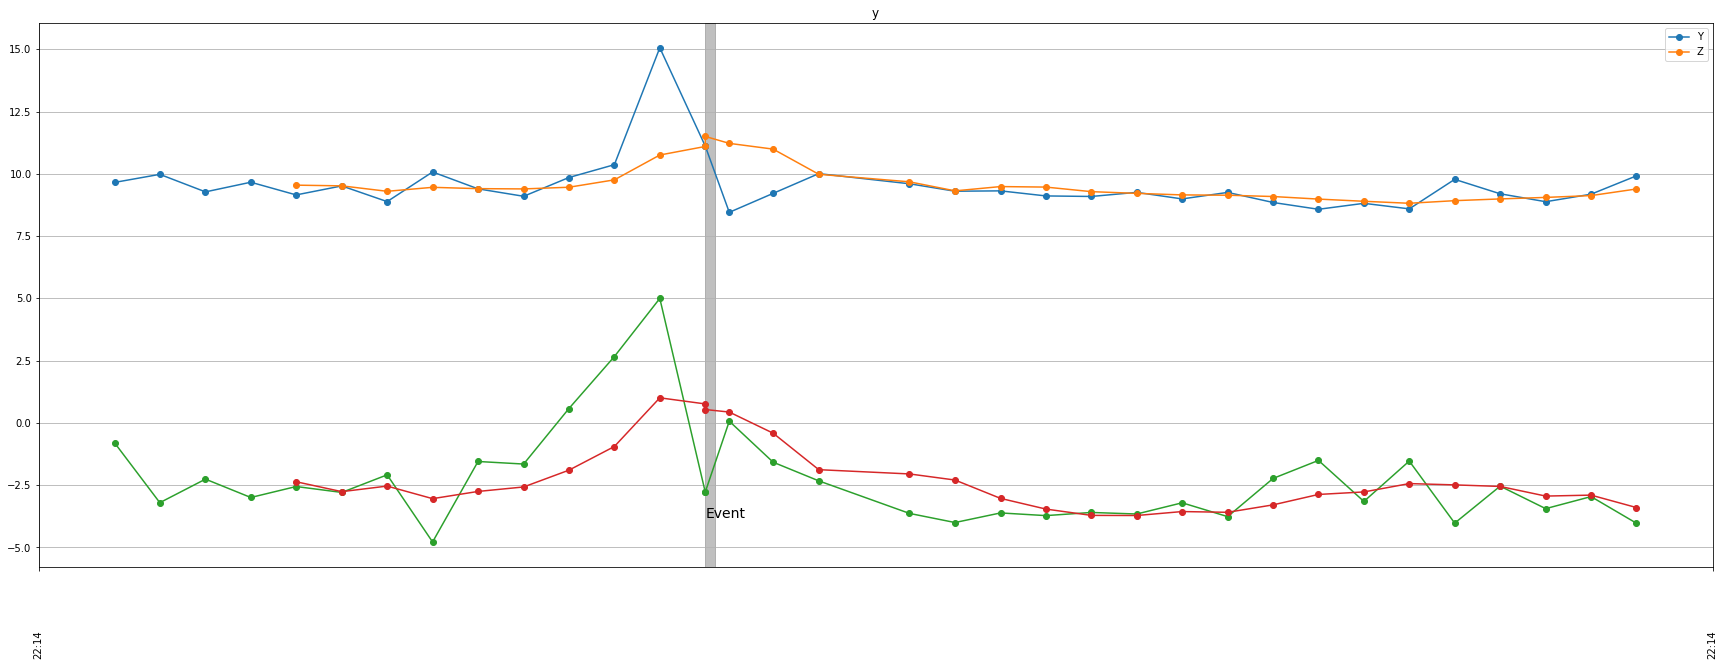

13052020221506
Shape: (46, 7)


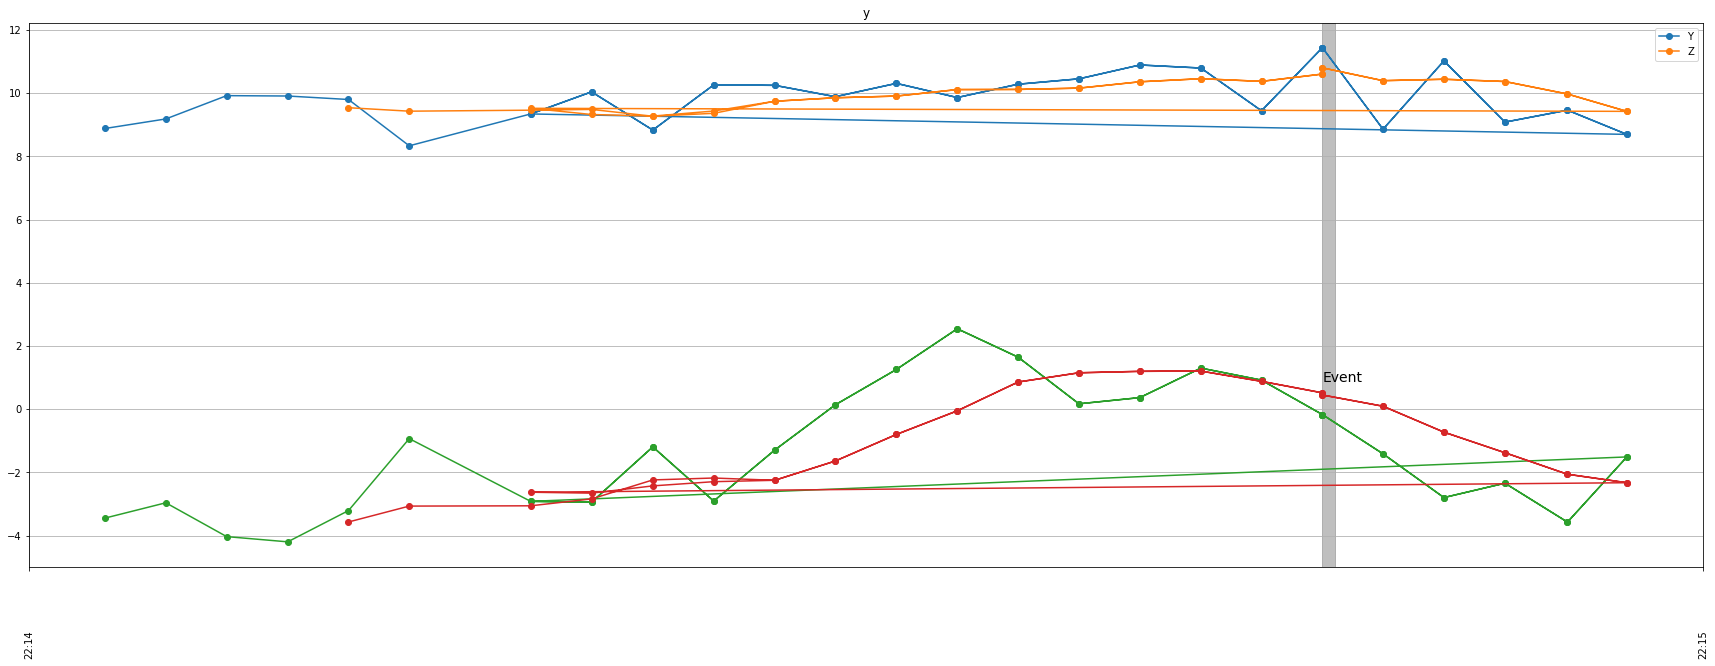

13052020221506
Shape: (46, 7)


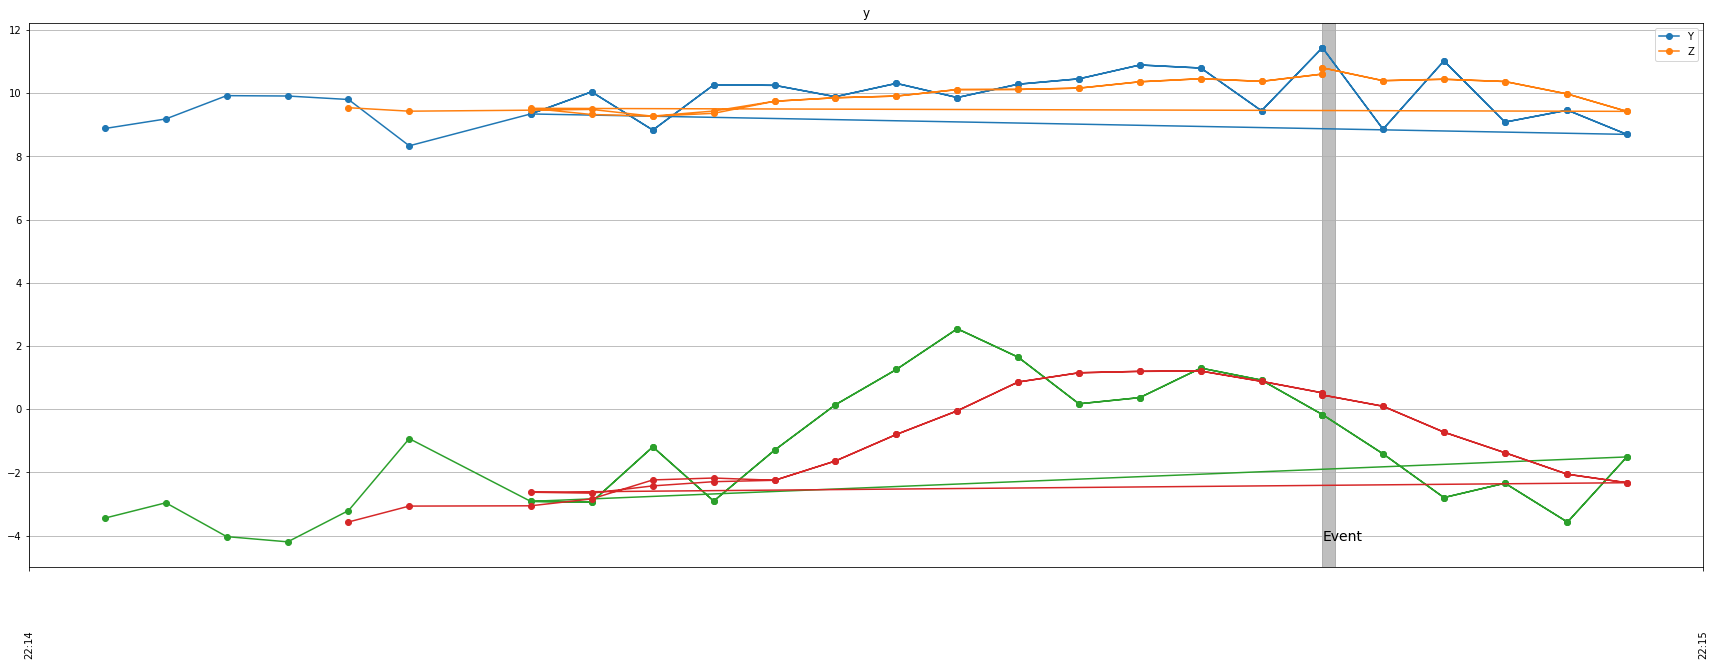

13052020221533
Shape: (41, 7)


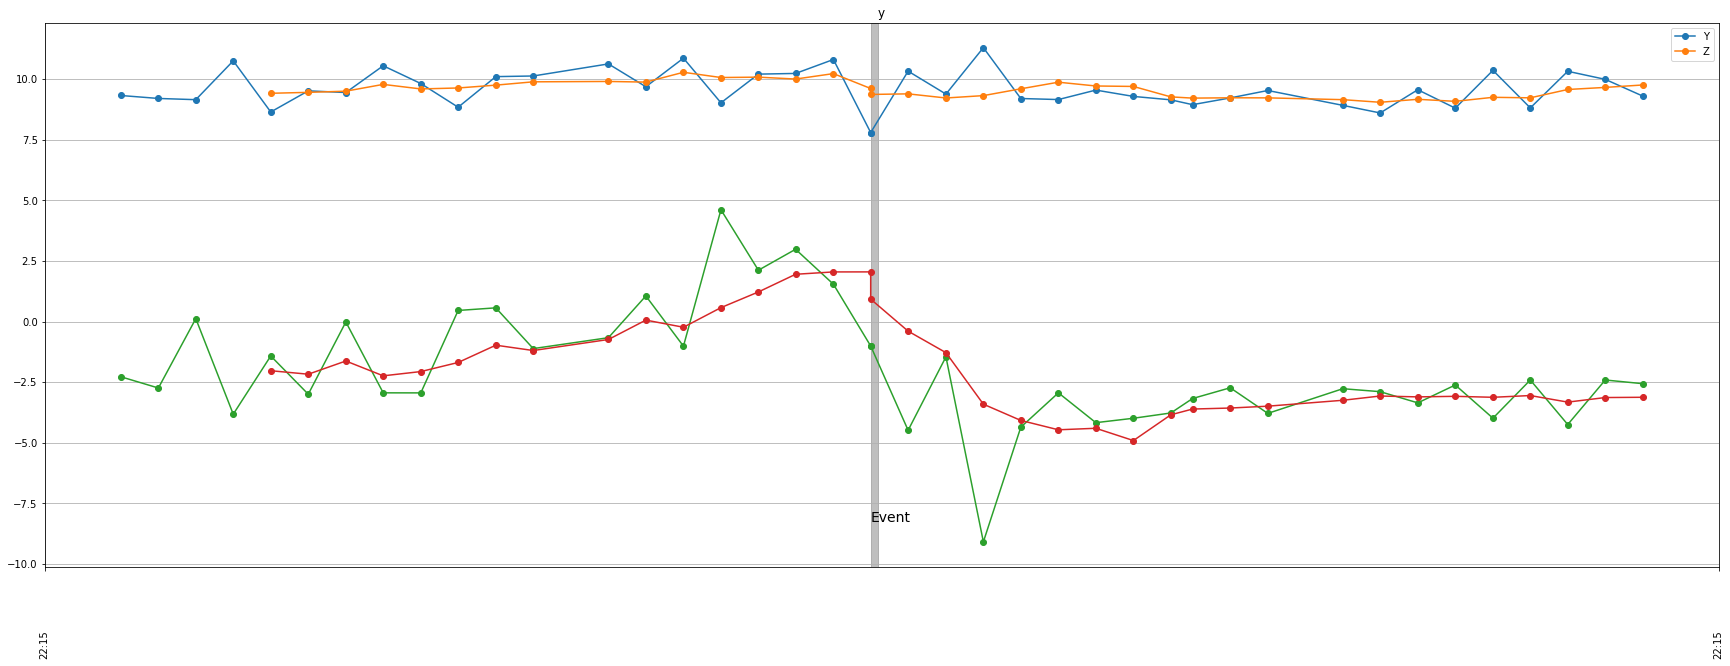

13052020221556
Shape: (53, 7)


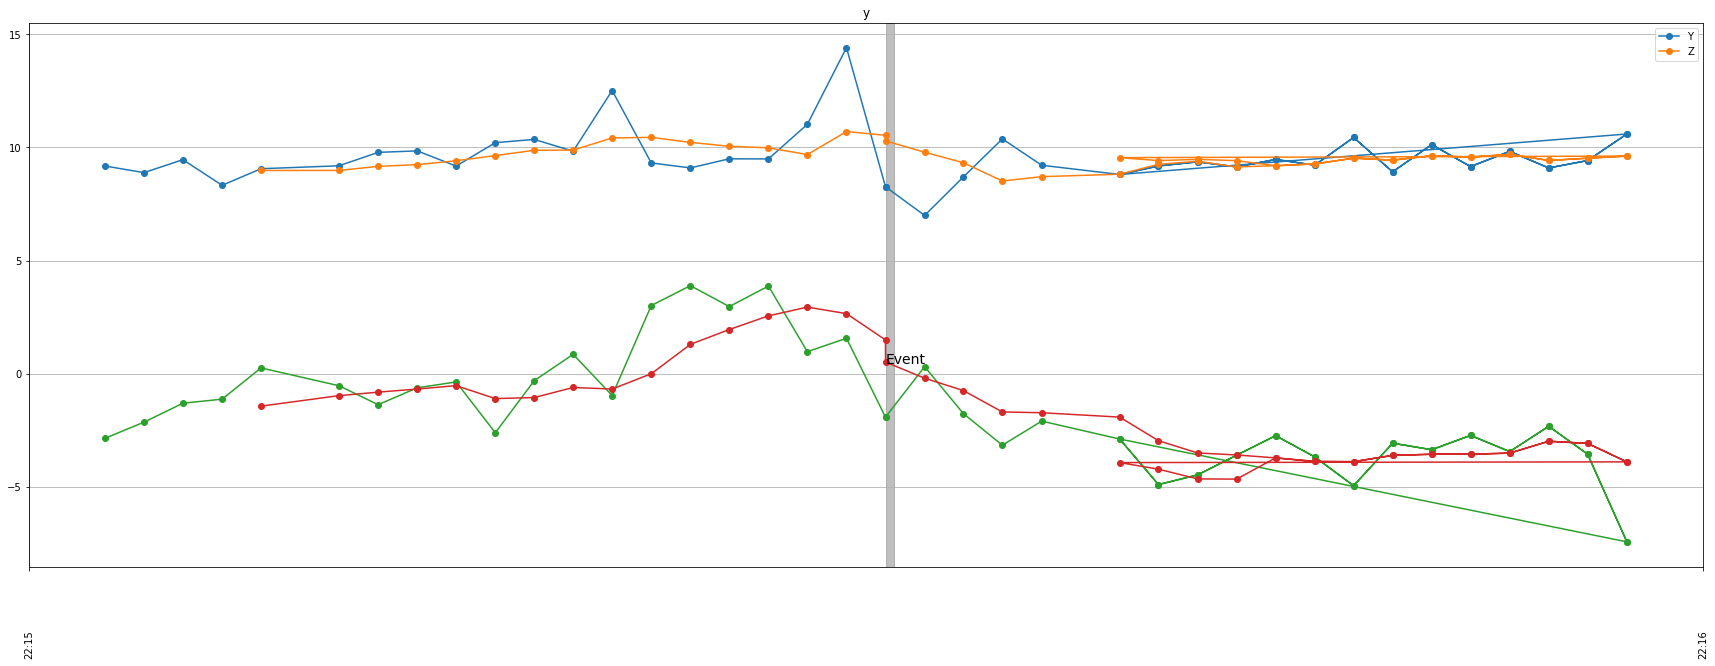

13052020221717
Shape: (41, 7)


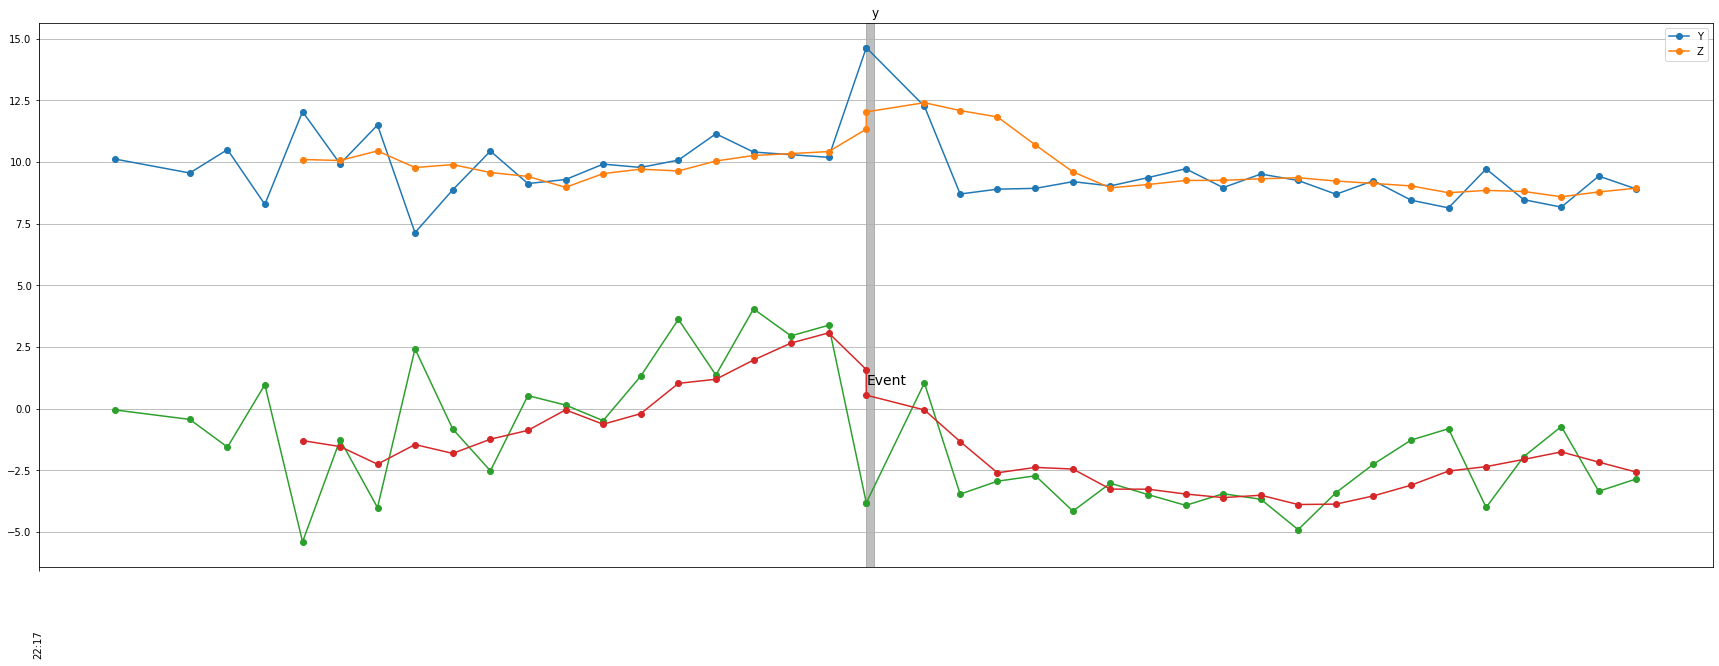

13052020221743
Shape: (53, 7)


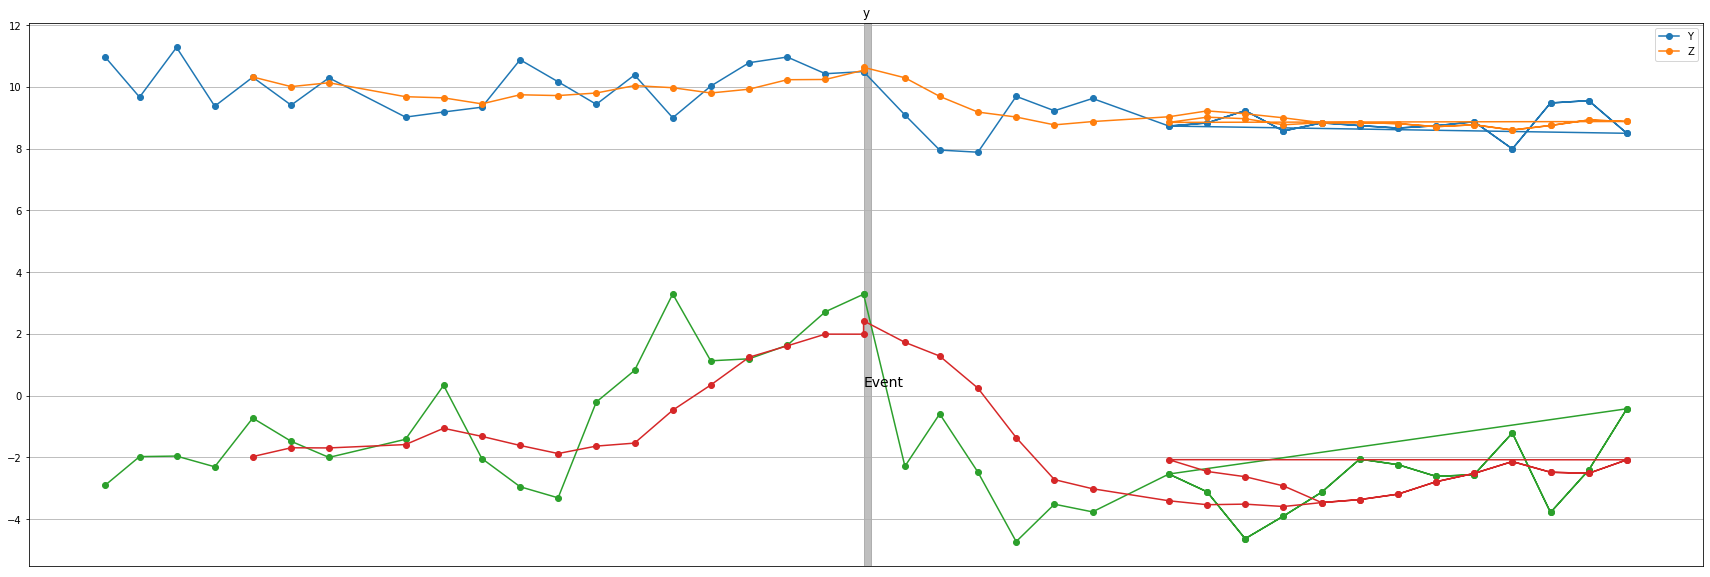

13052020221814
Shape: (39, 7)


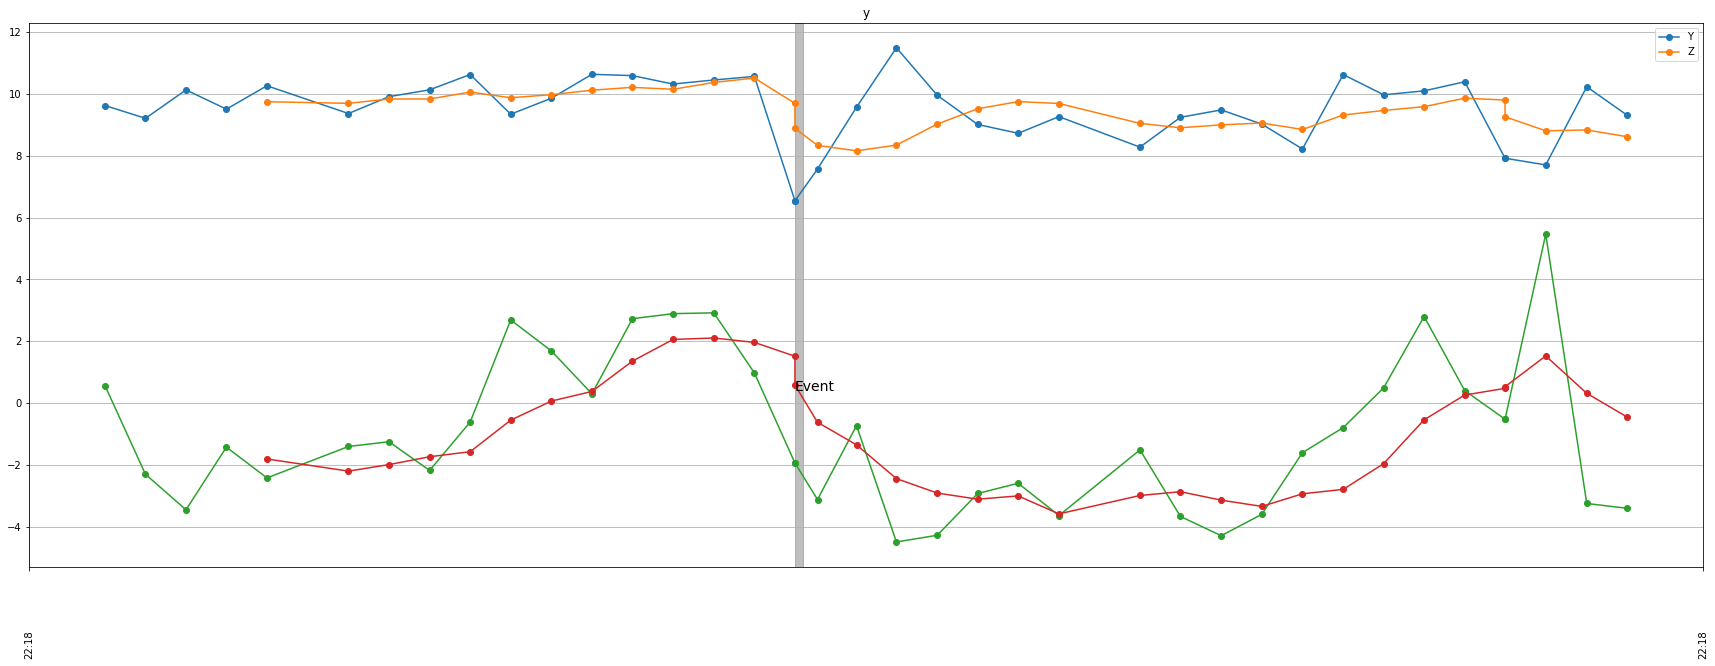

13052020221822
Shape: (43, 7)


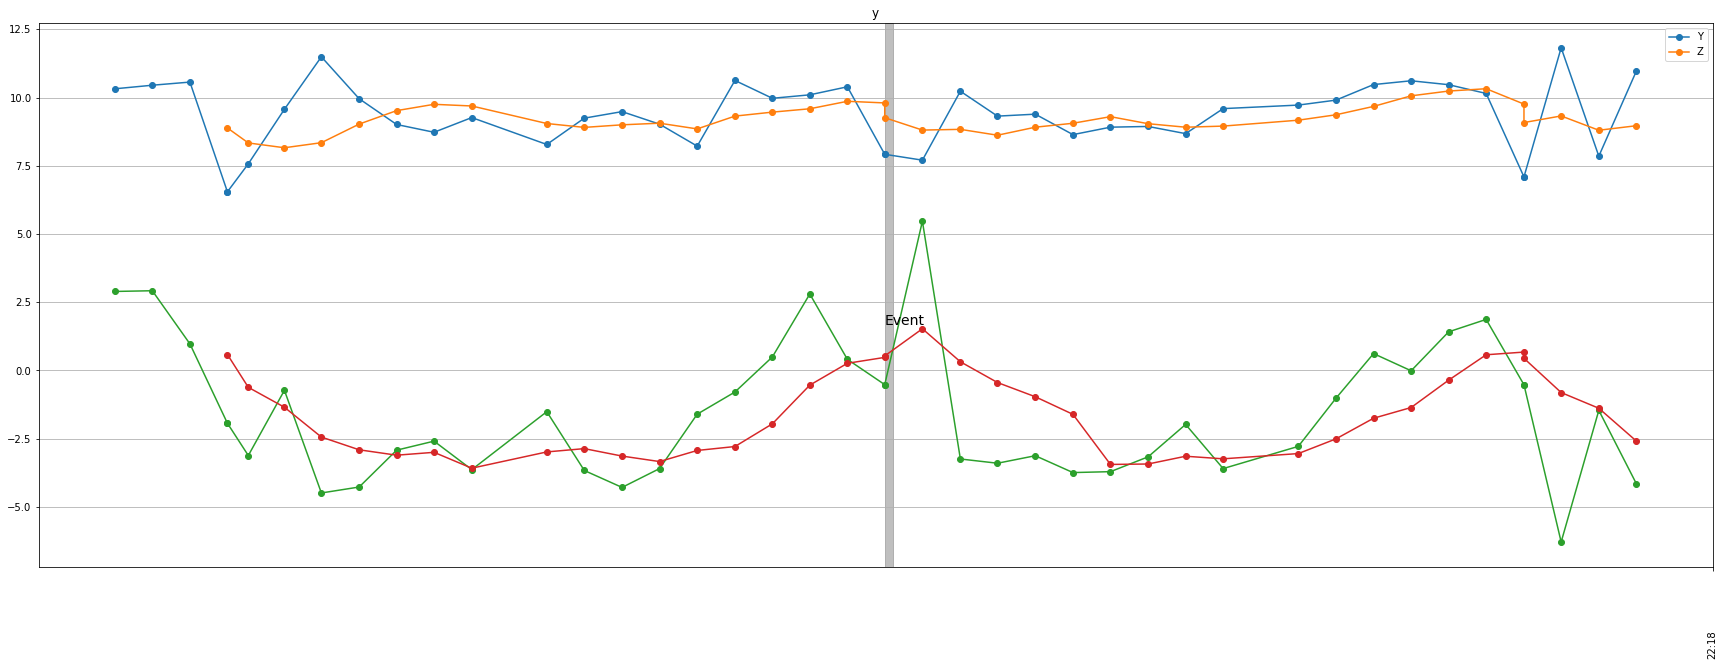

13052020221830
Shape: (43, 7)


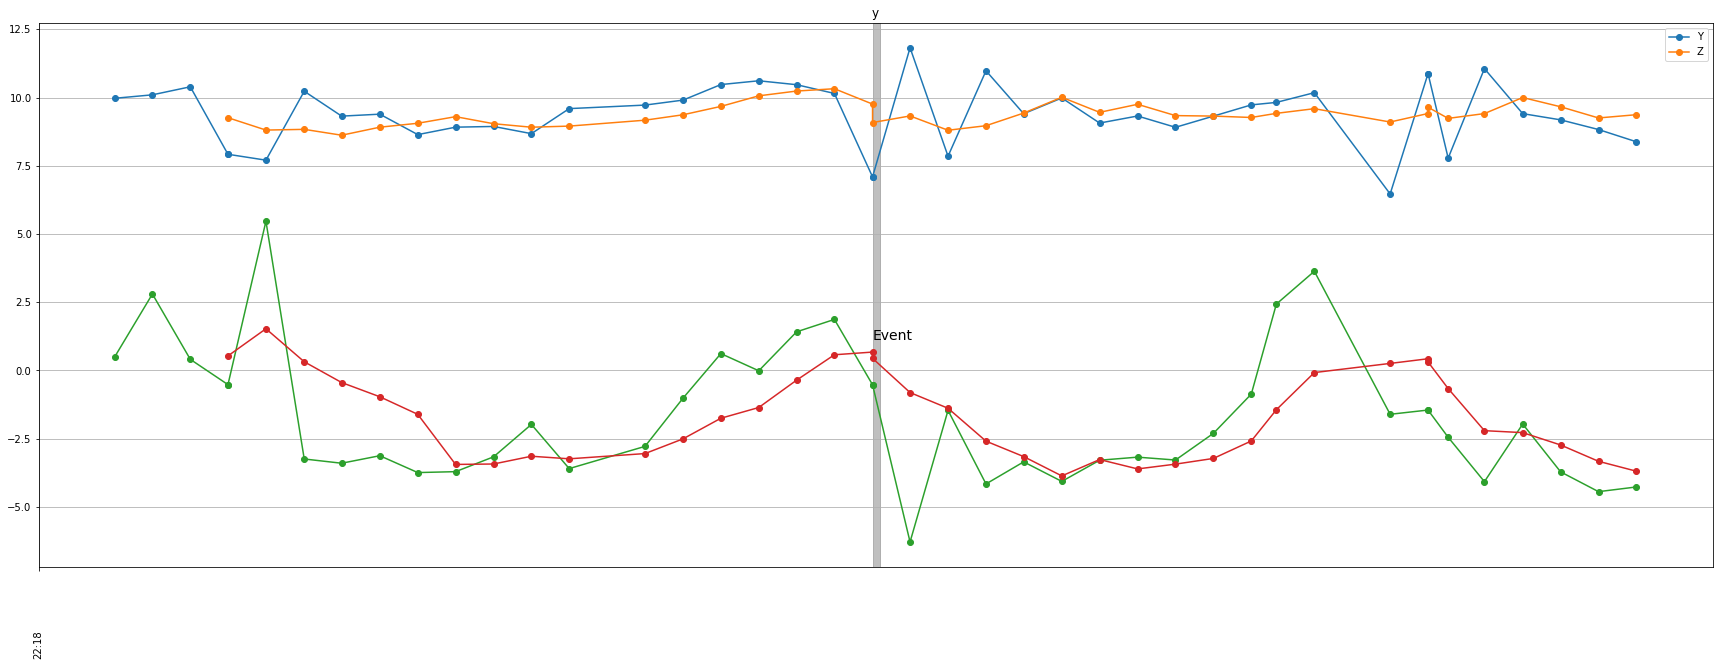

13052020221837
Shape: (43, 7)


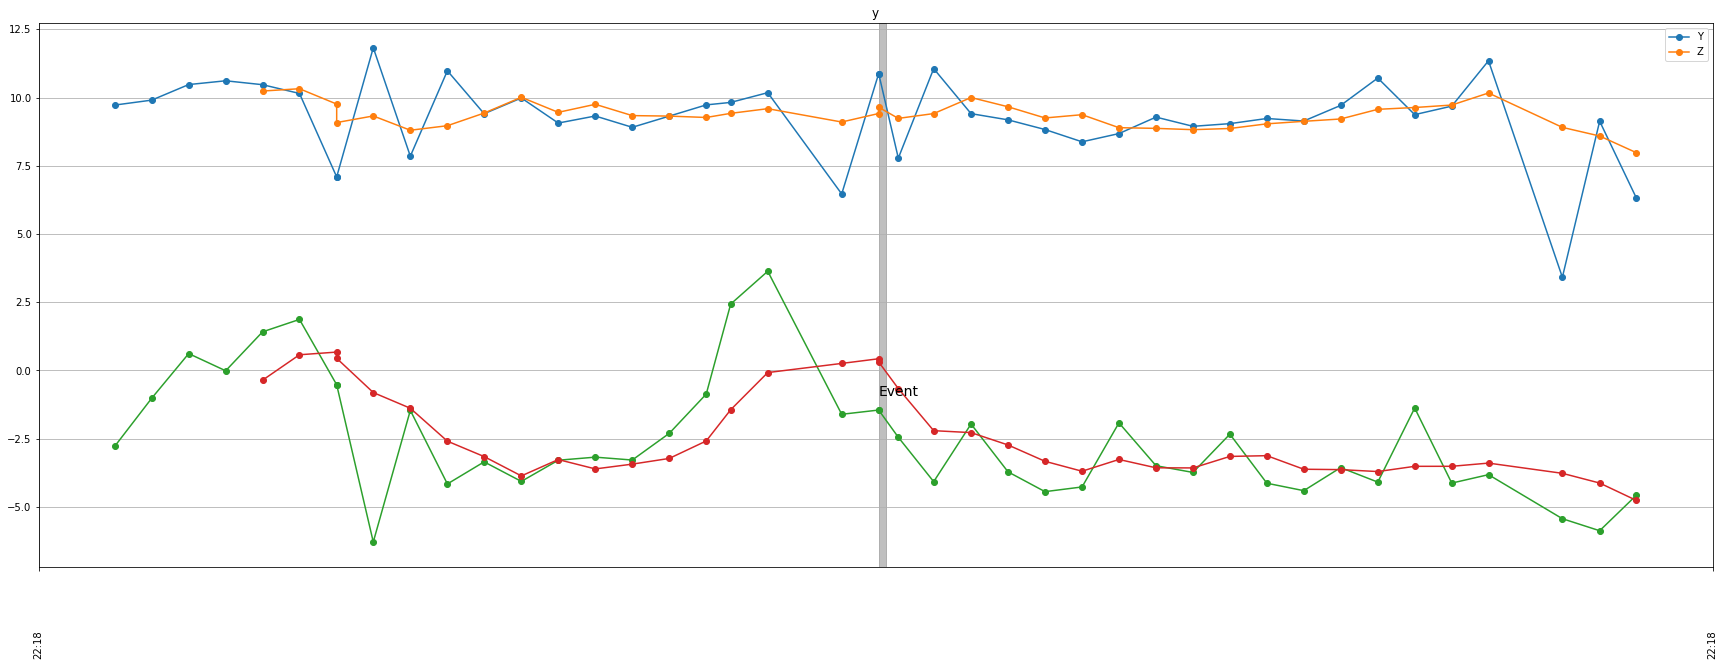

13052020221946
Shape: (41, 7)


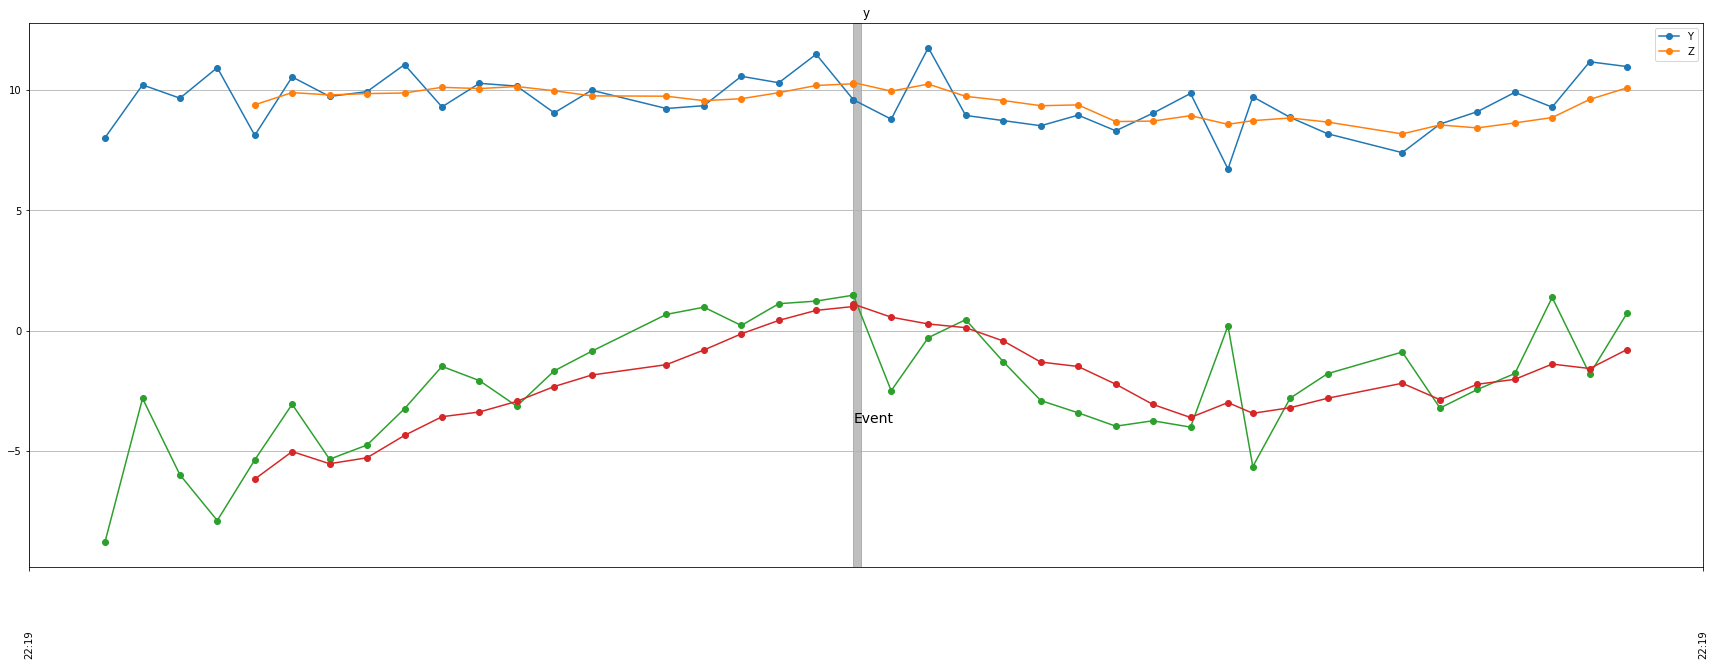

13052020221957
Shape: (43, 7)


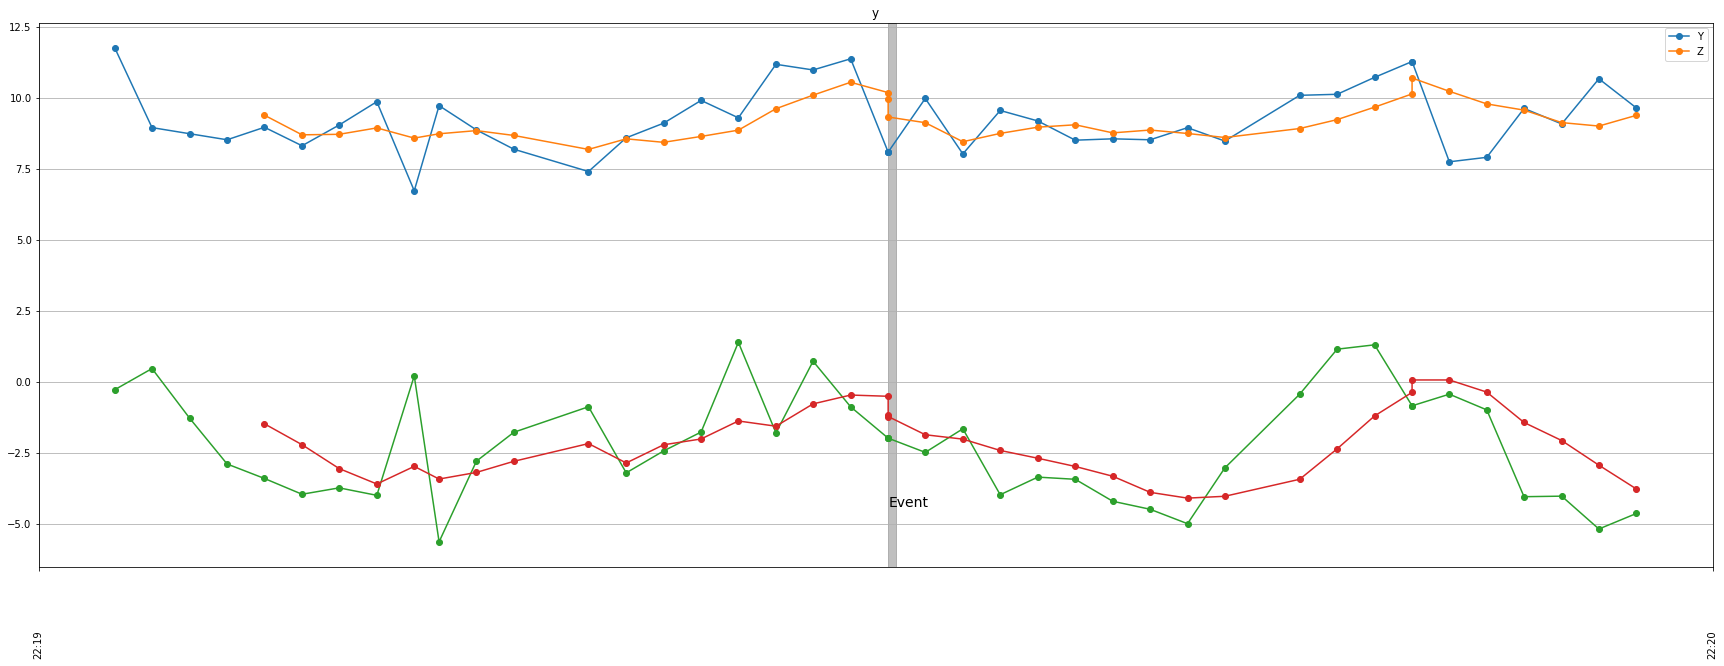

13052020221957
Shape: (43, 7)


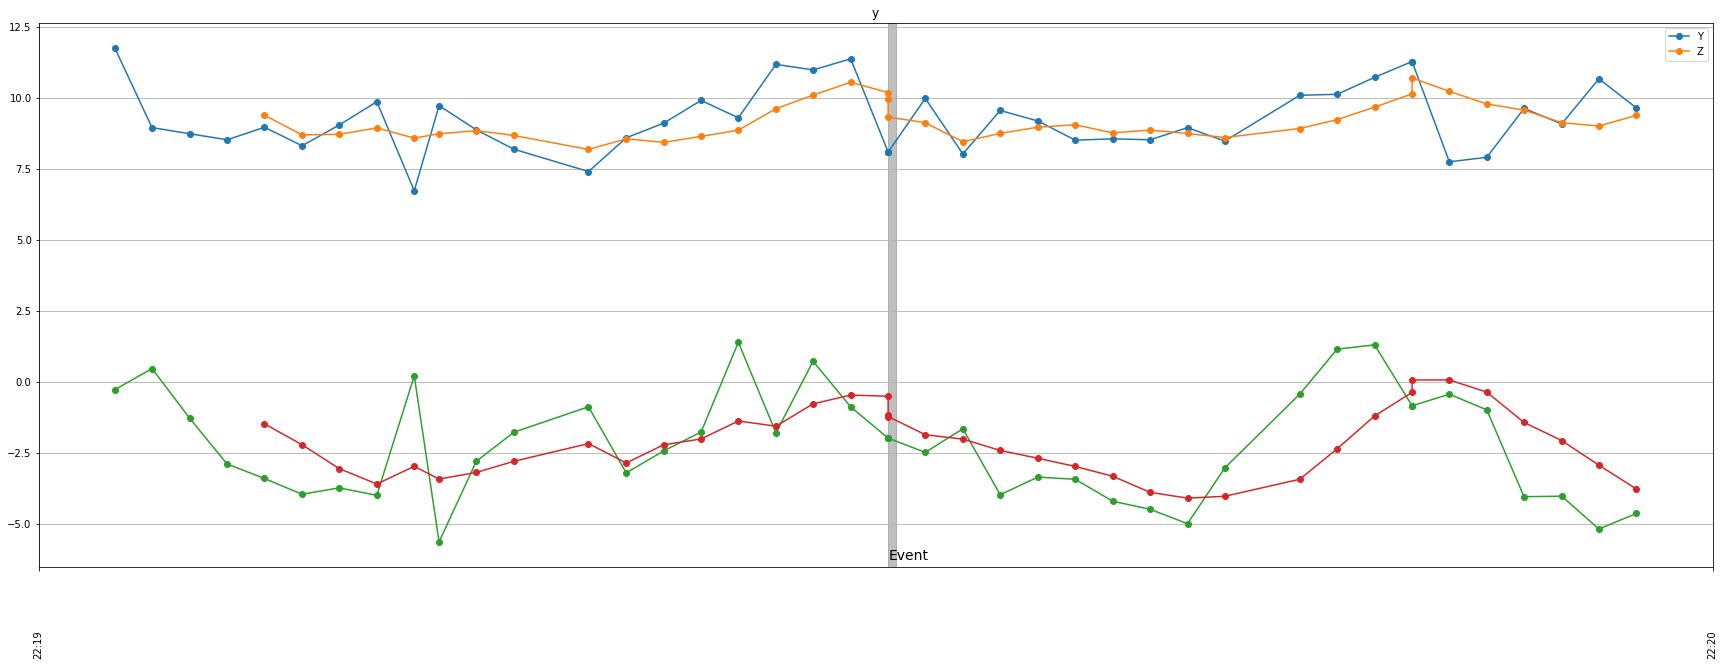

13052020222004
Shape: (43, 7)


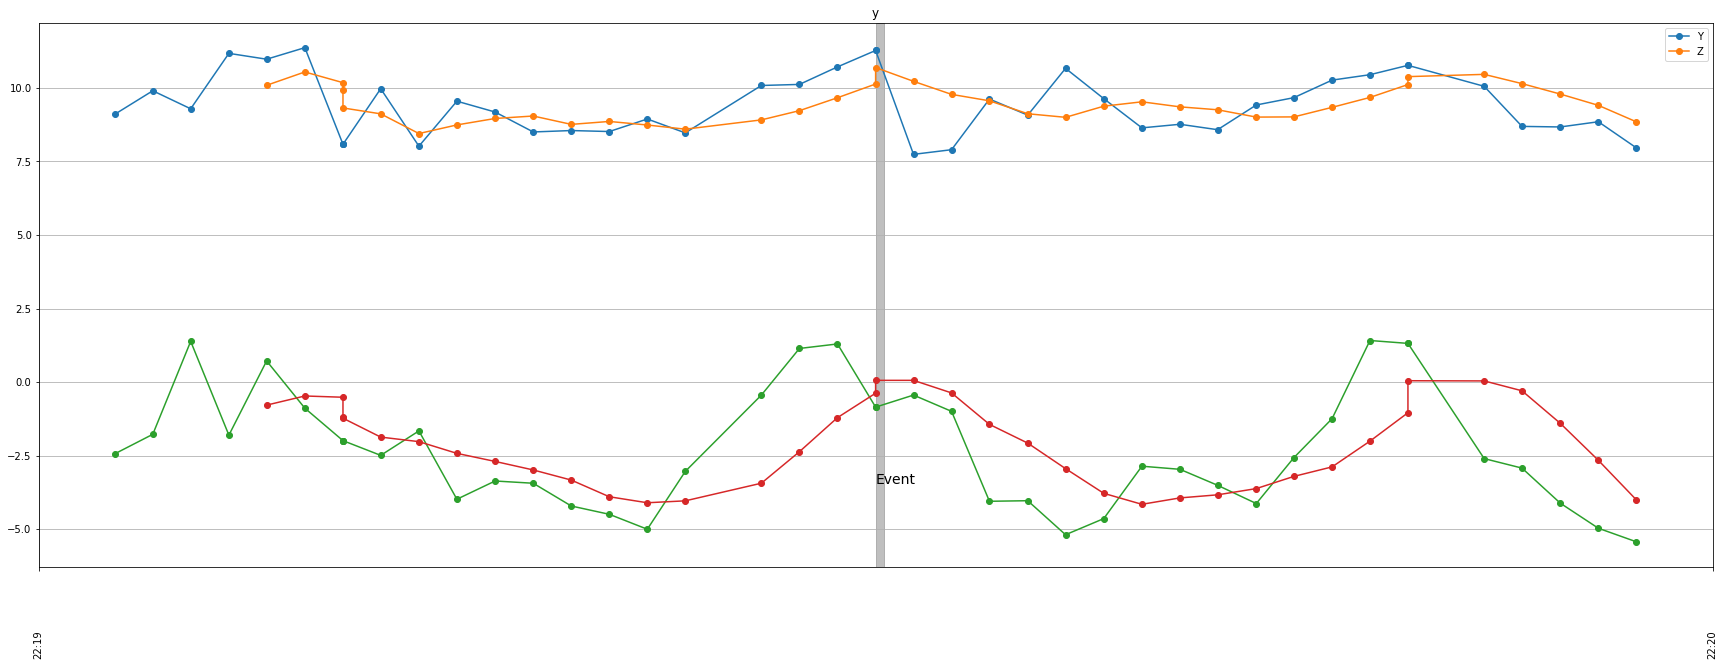

13052020222011
Shape: (42, 7)


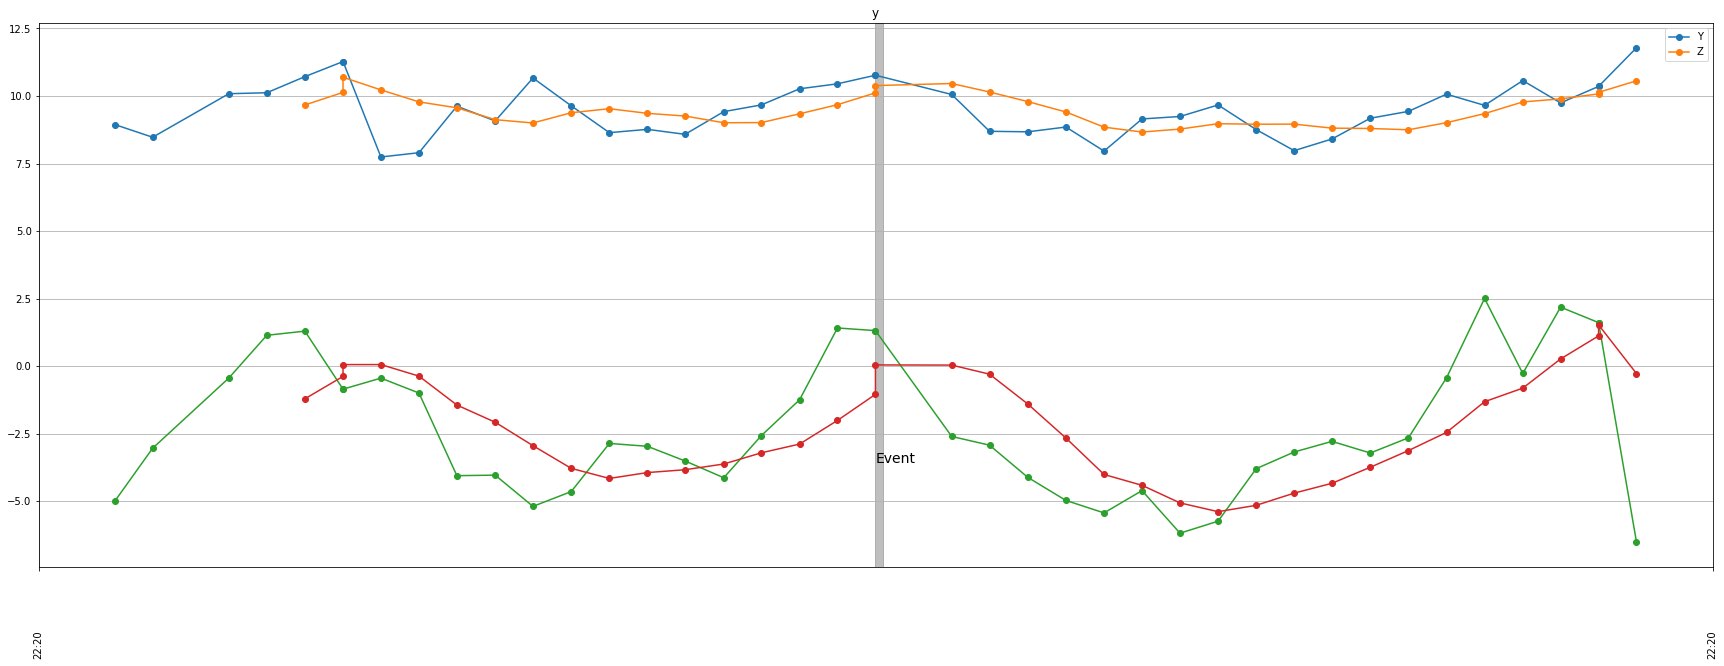

13052020222020
Shape: (59, 7)


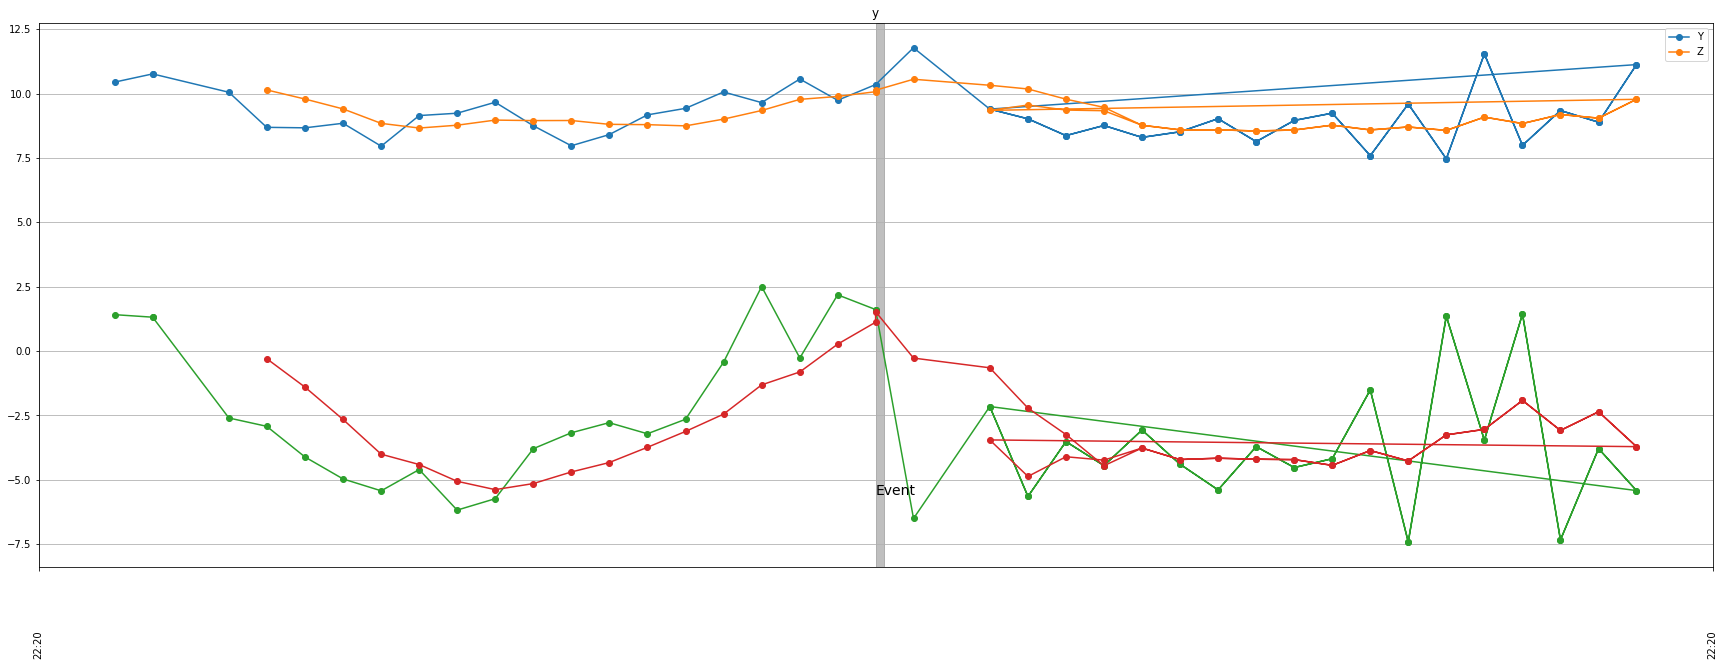

13052020222047
Shape: (41, 7)


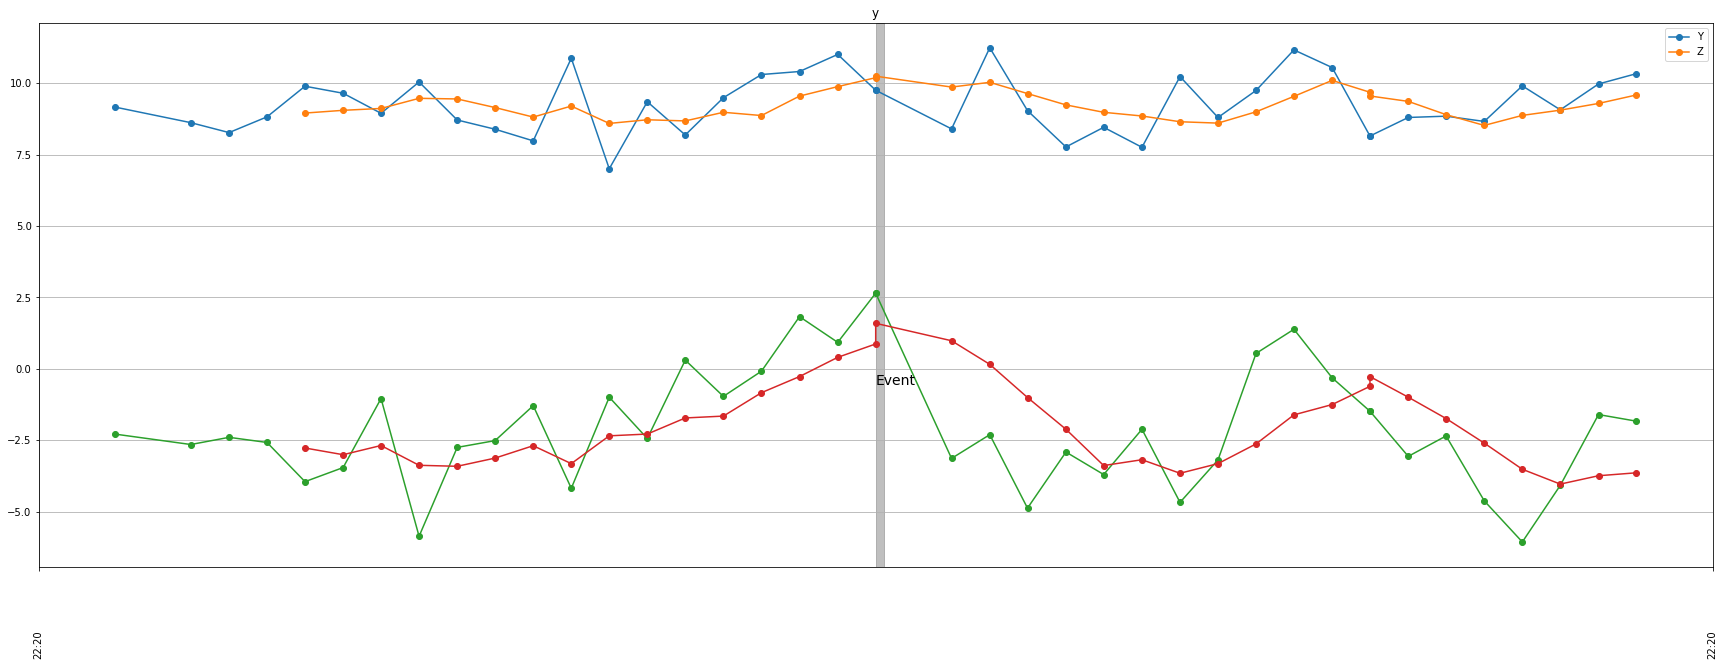

13052020222053
Shape: (41, 7)


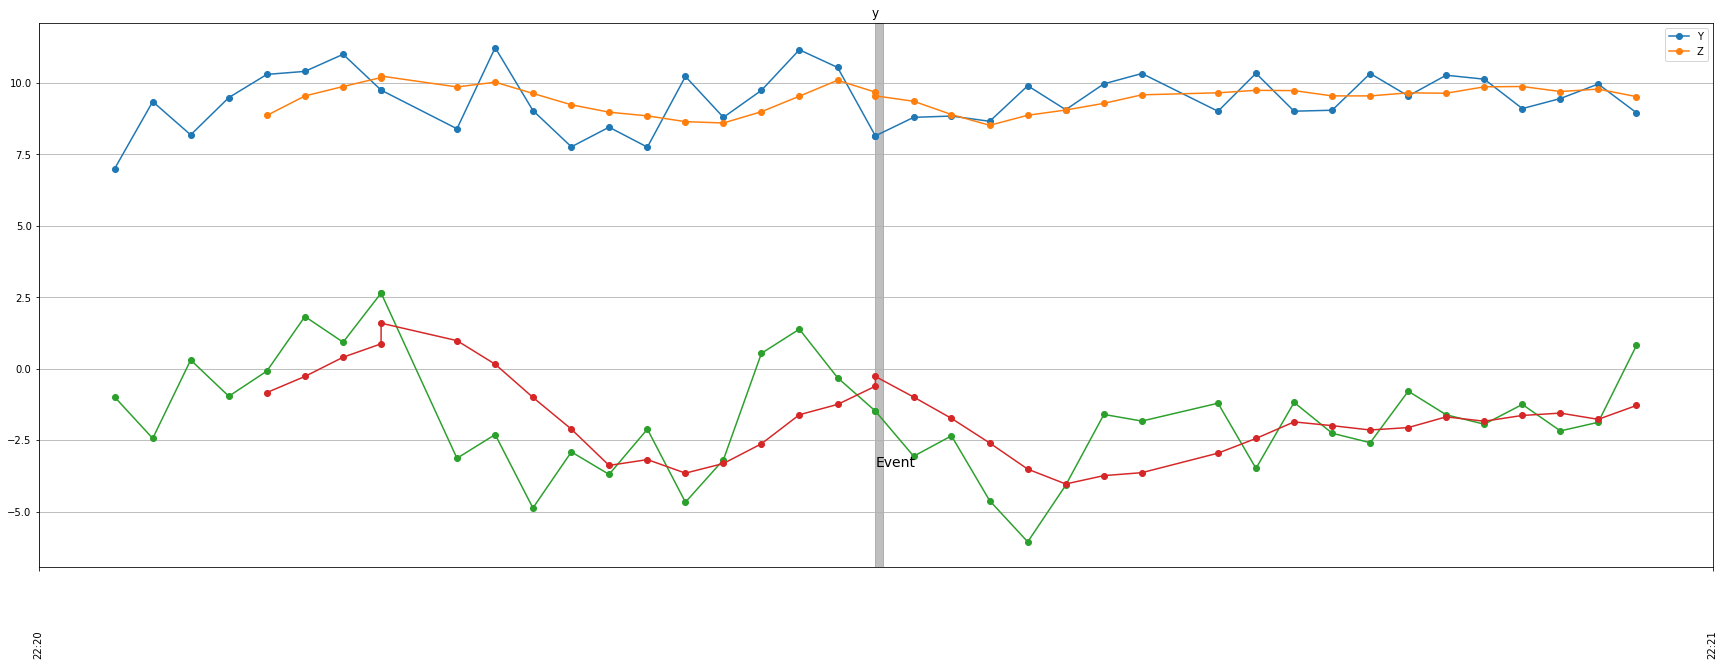

13052020222106
Shape: (39, 7)


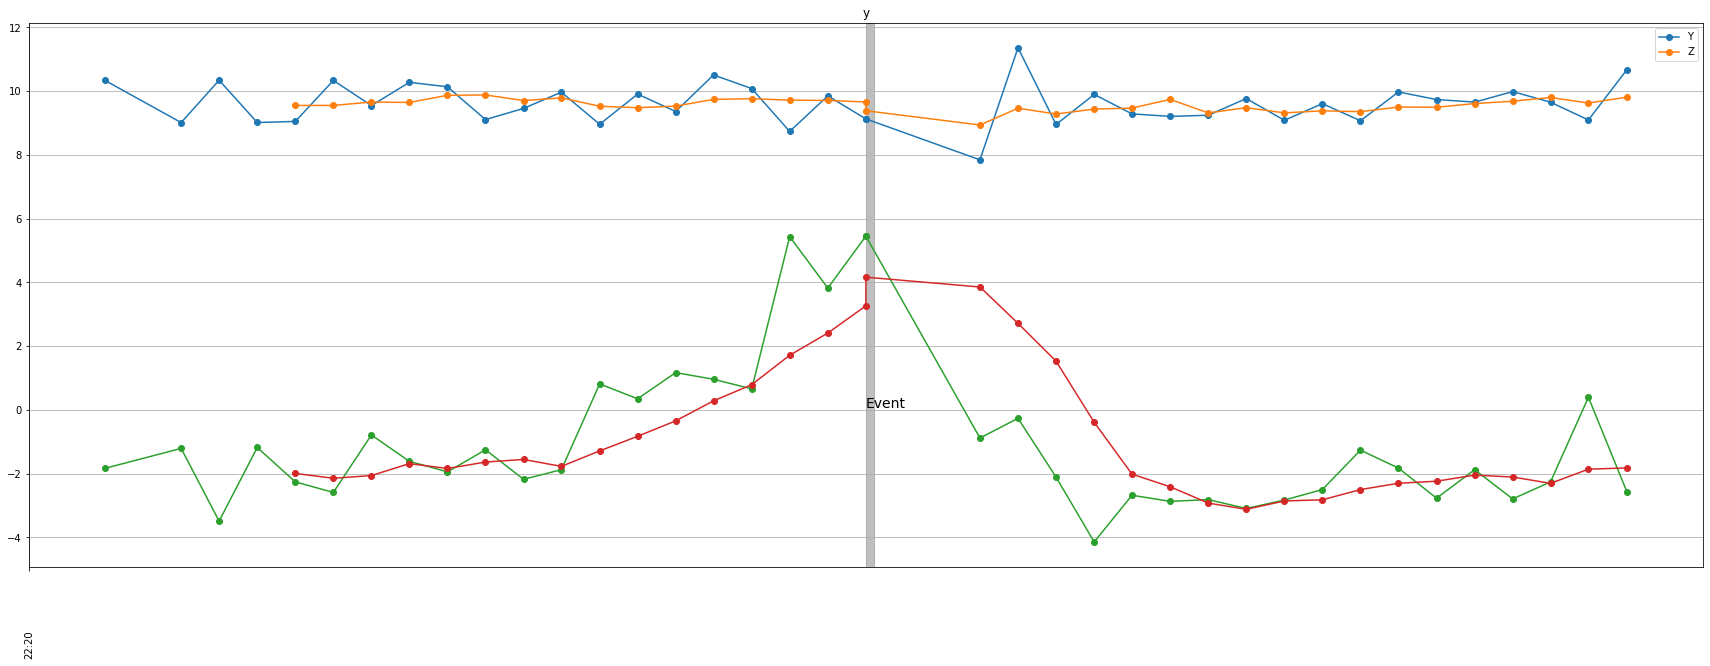

13052020222131
Shape: (47, 7)


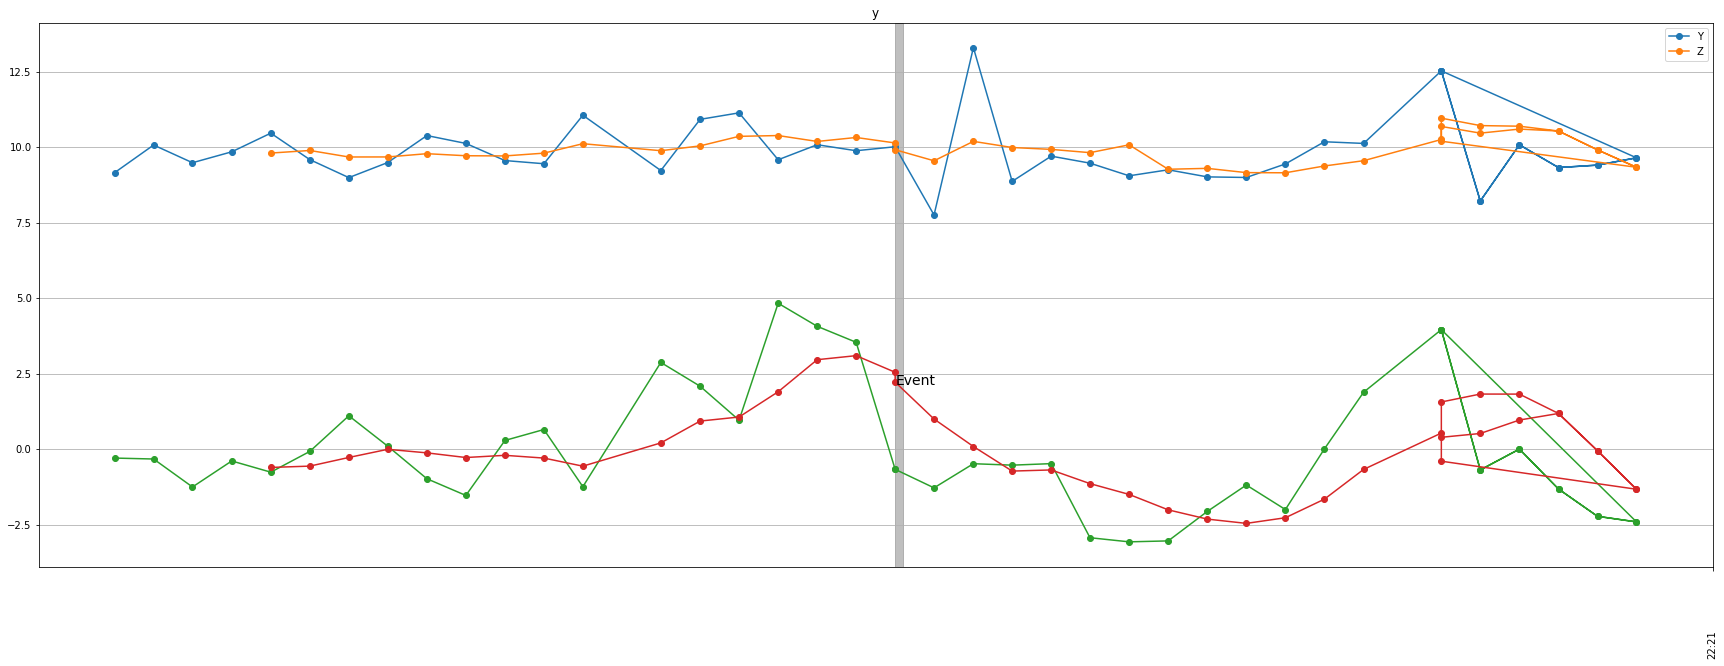

13052020222137
Shape: (34, 7)


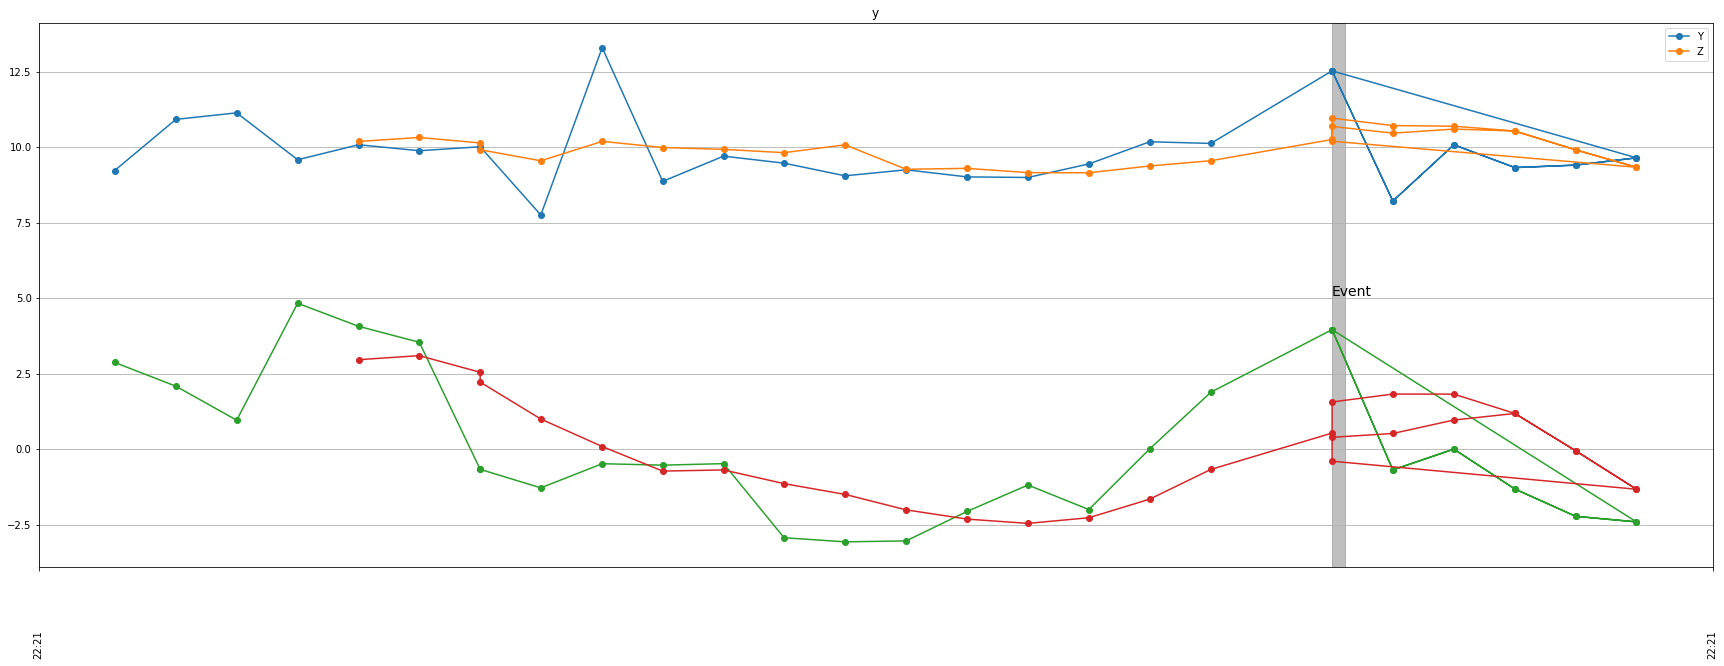

13052020222137
Shape: (34, 7)


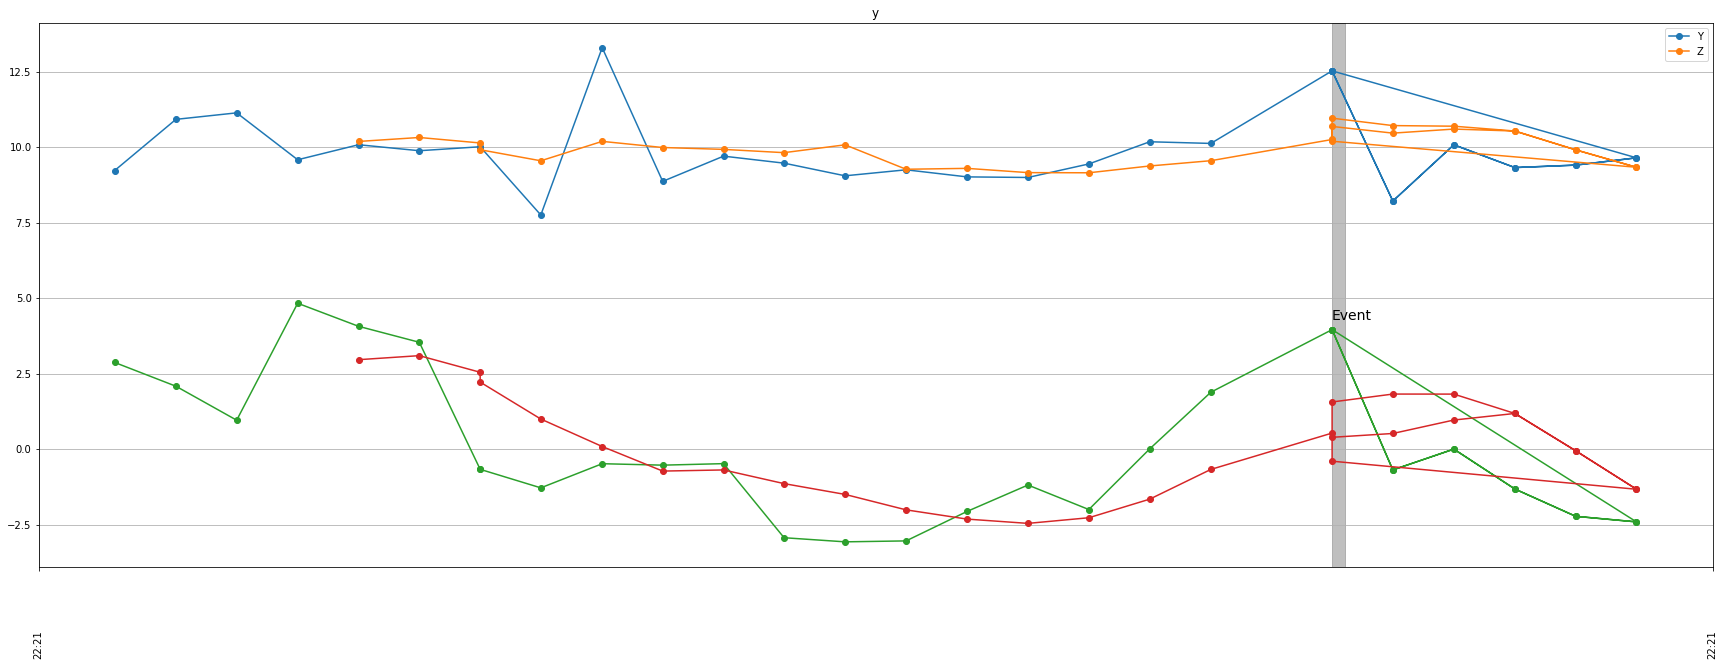

13052020222202
Shape: (41, 7)


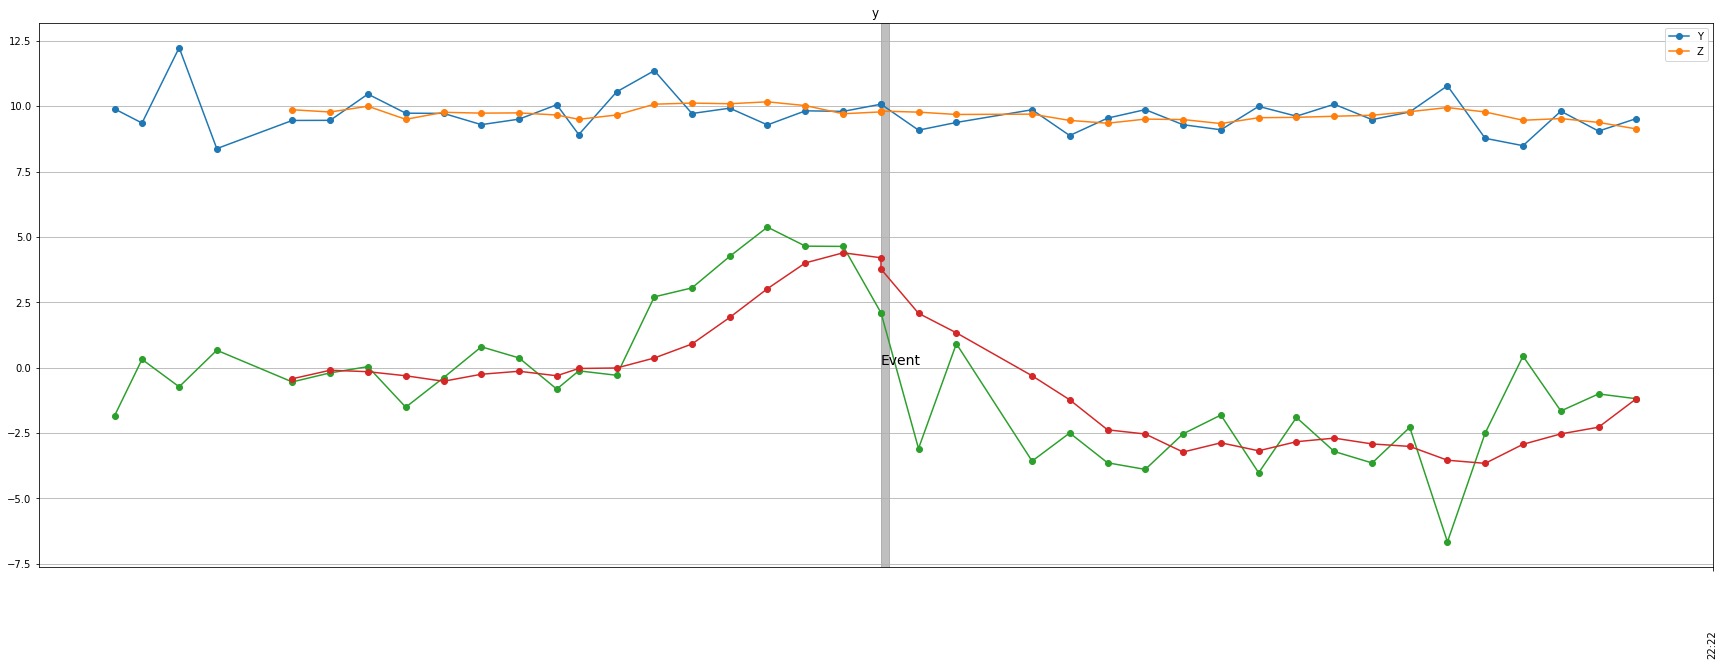

13052020222231
Shape: (33, 7)


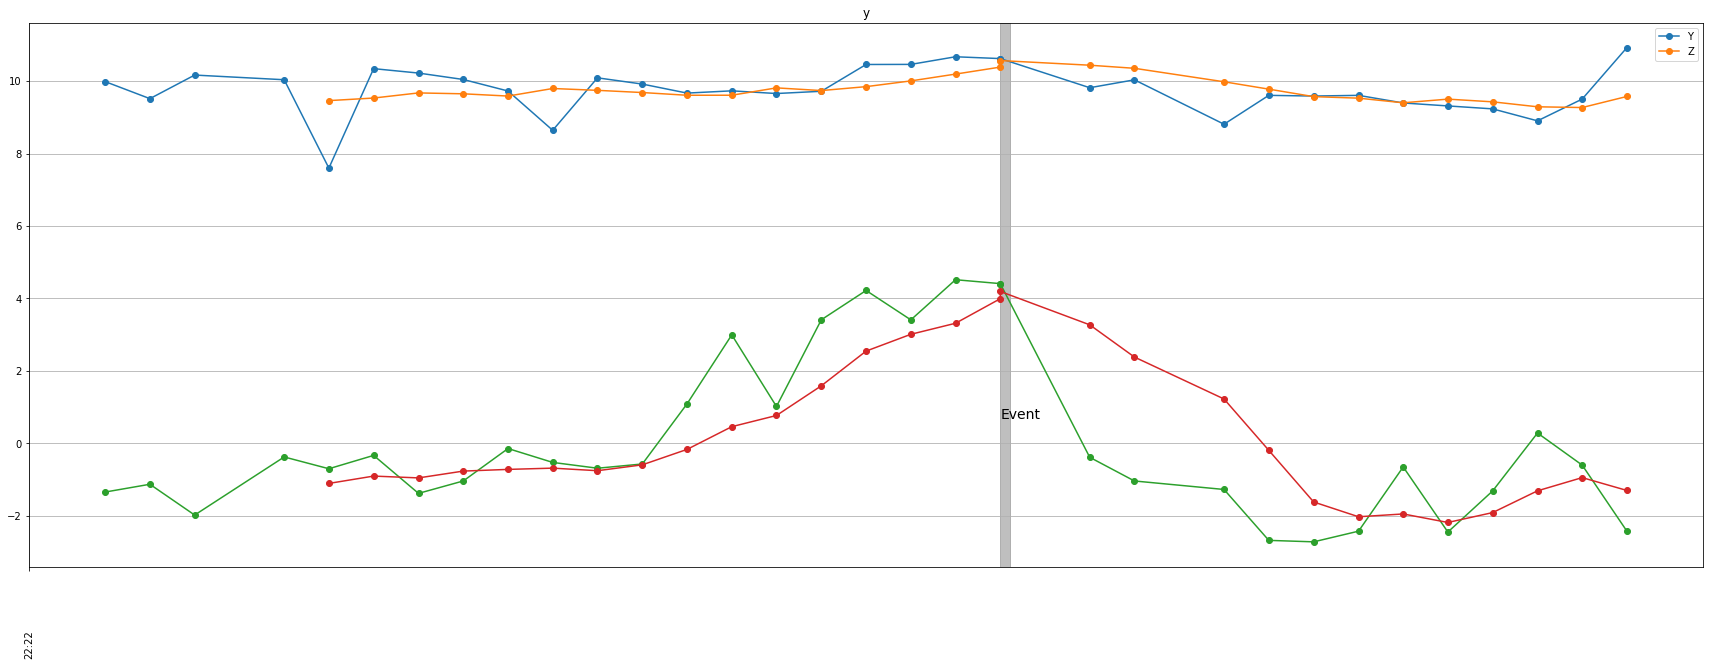

13052020222450
Shape: (41, 7)


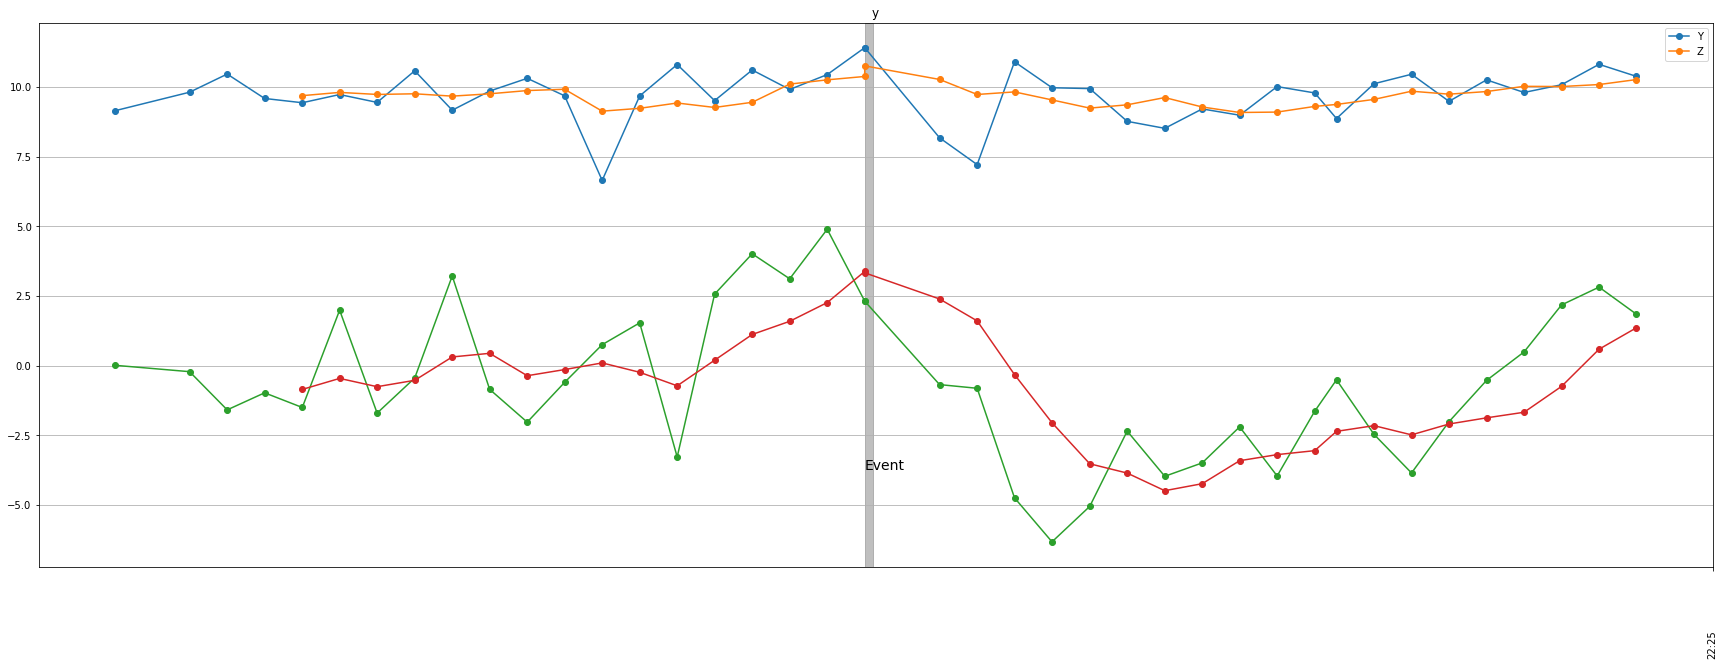

13052020222501
Shape: (40, 7)


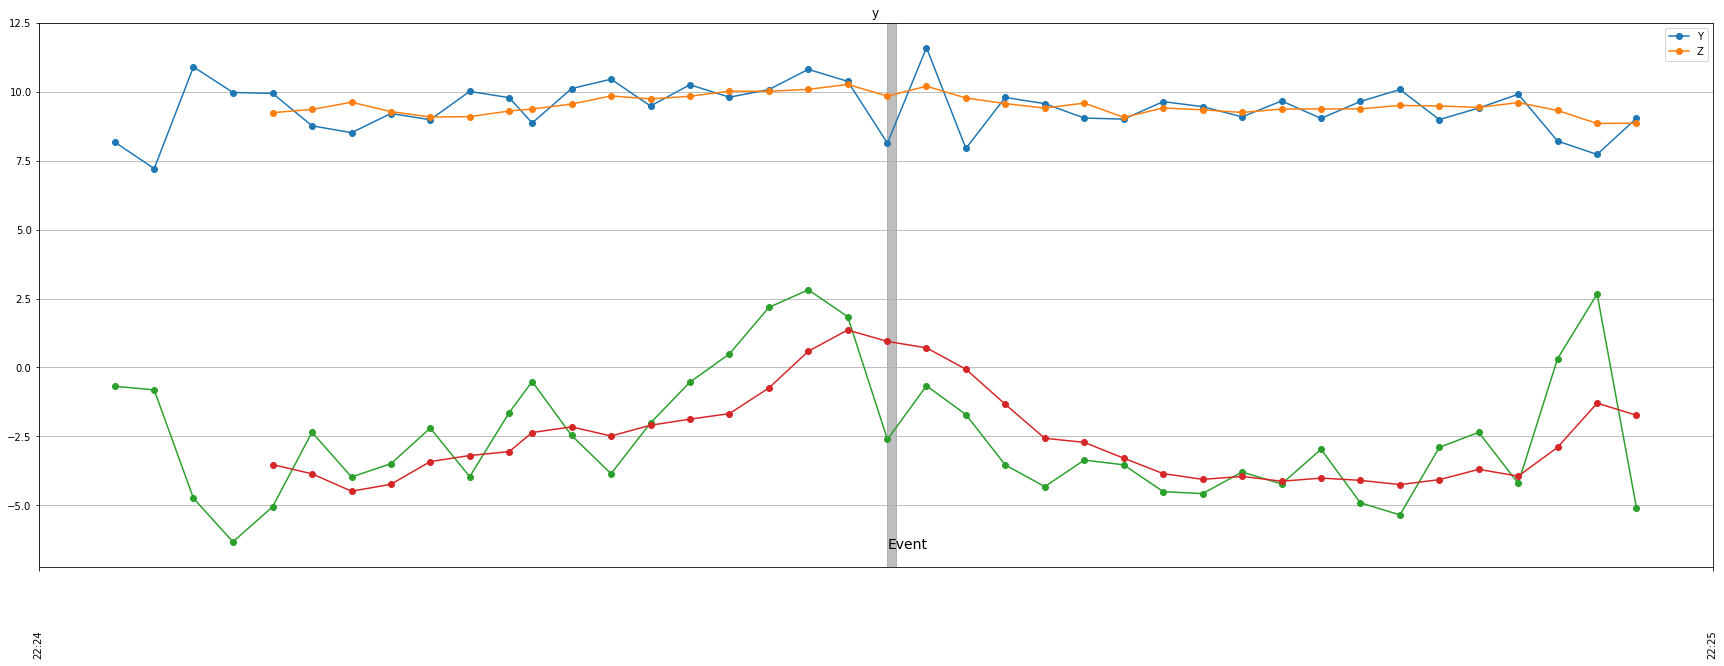

13052020222518
Shape: (40, 7)


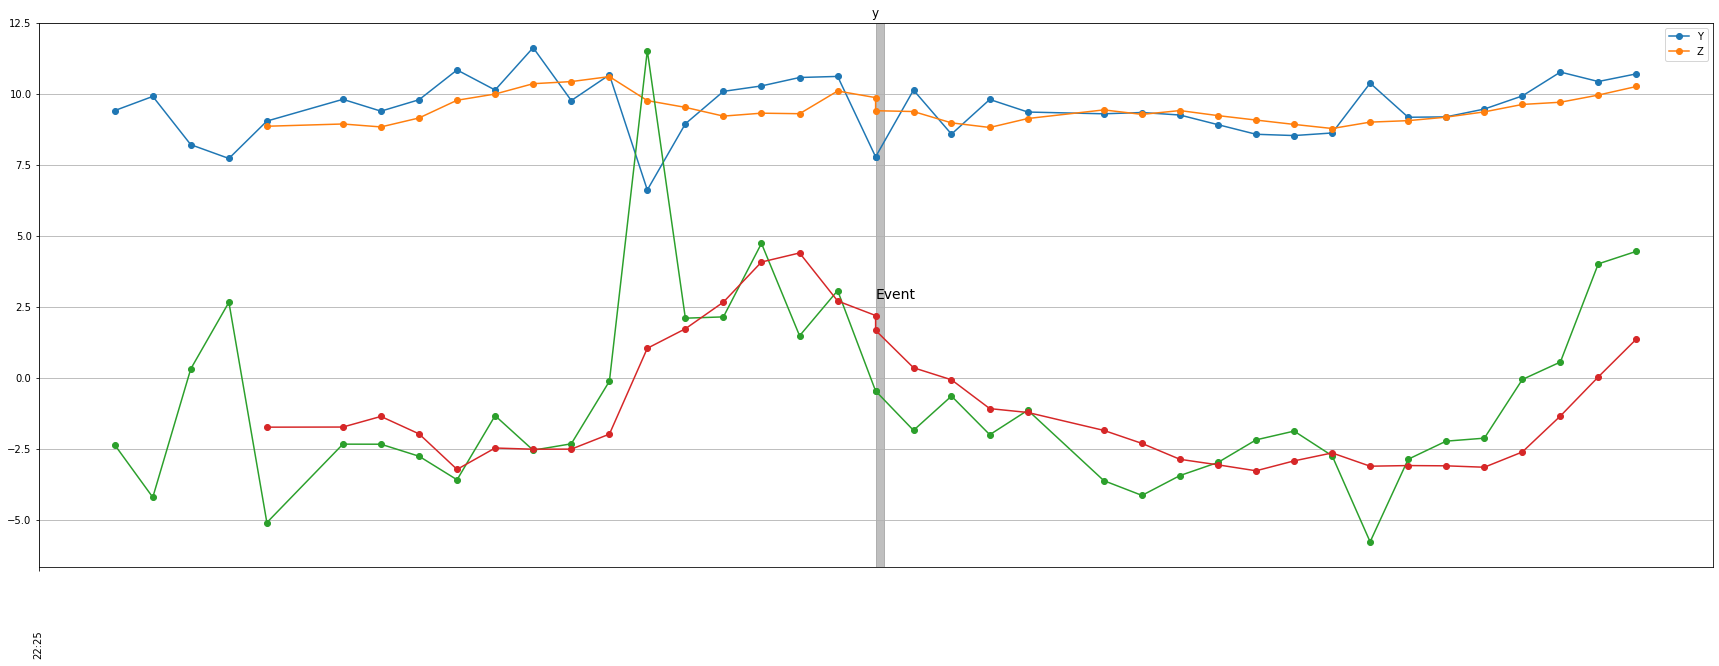

13052020222528
Shape: (44, 7)


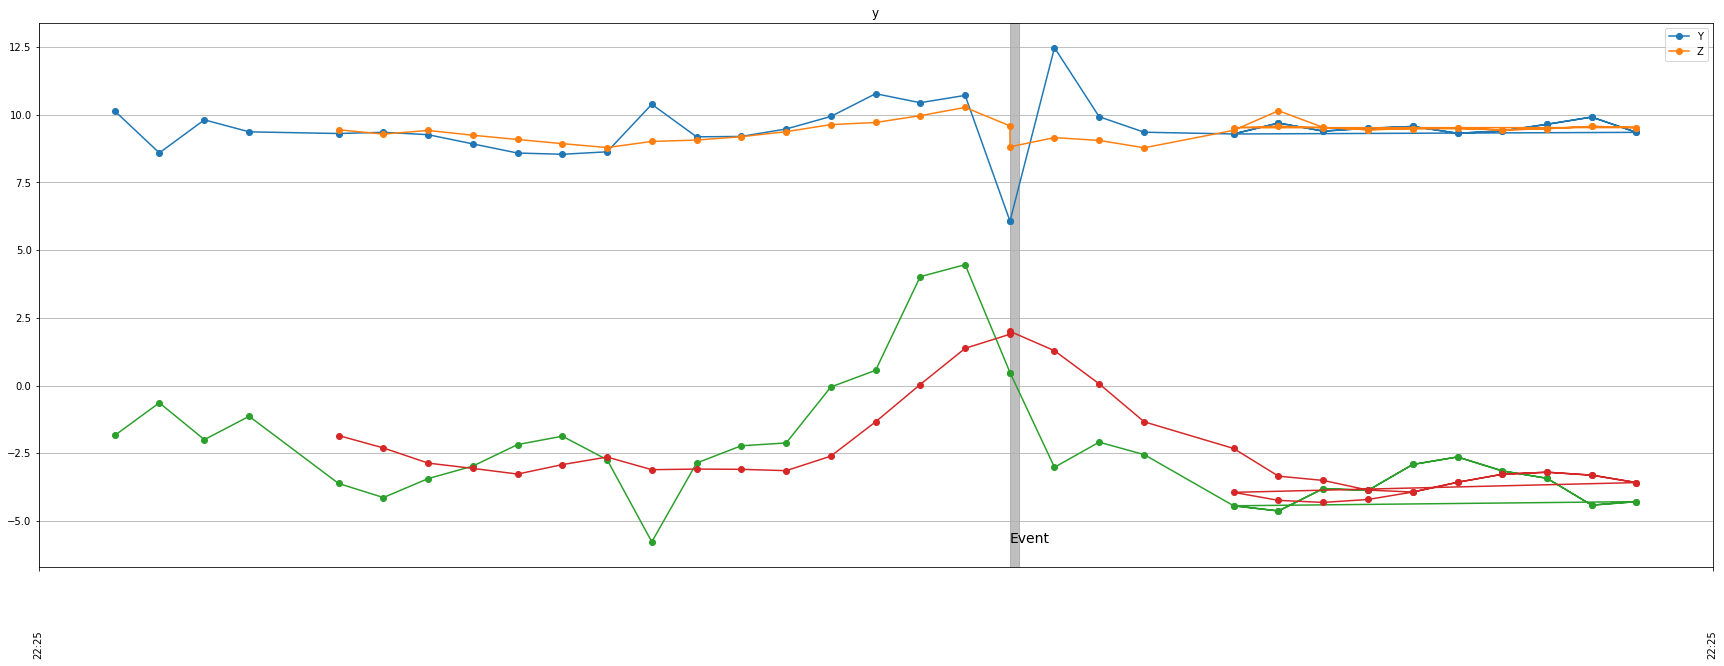

13052020222550
Shape: (40, 7)


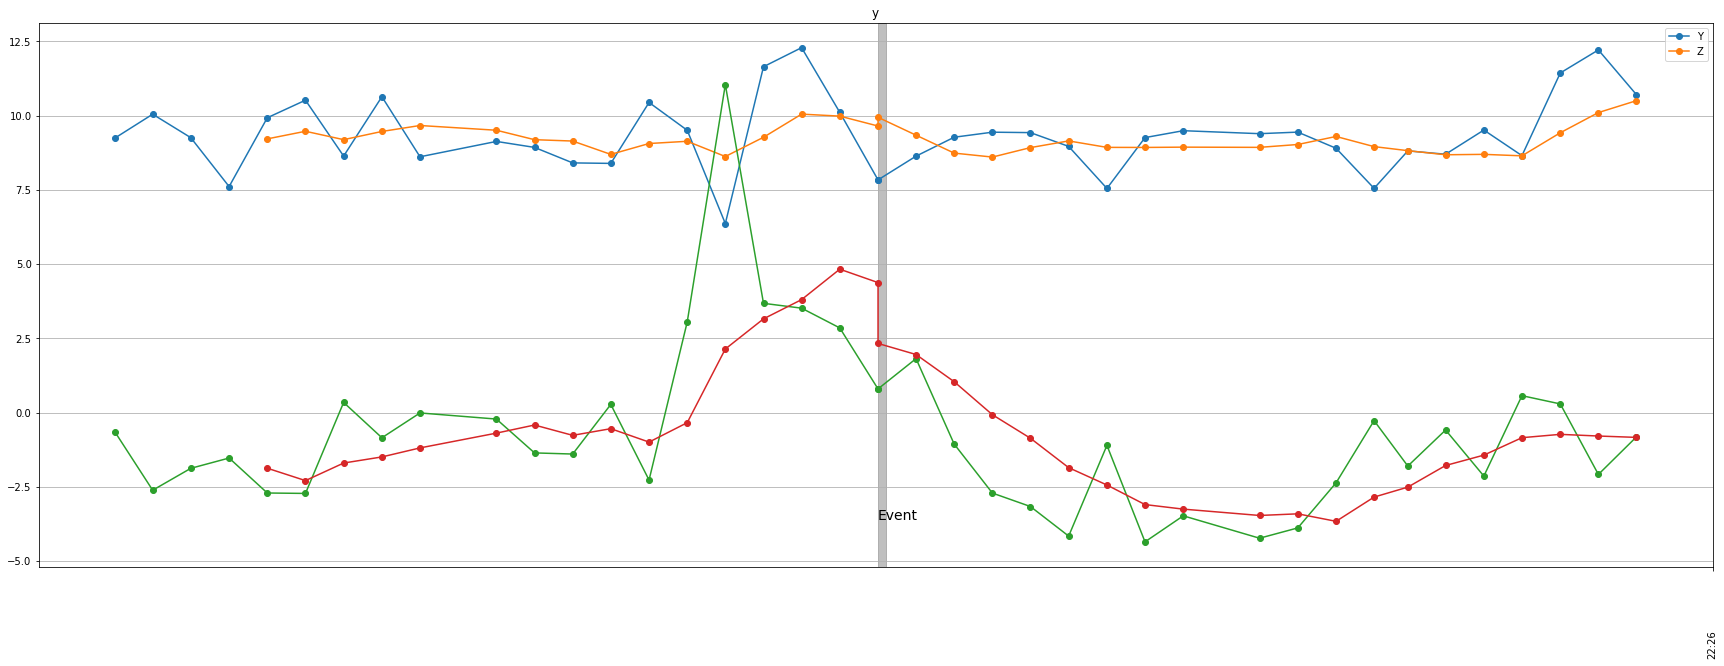

13052020222618
Shape: (24, 7)


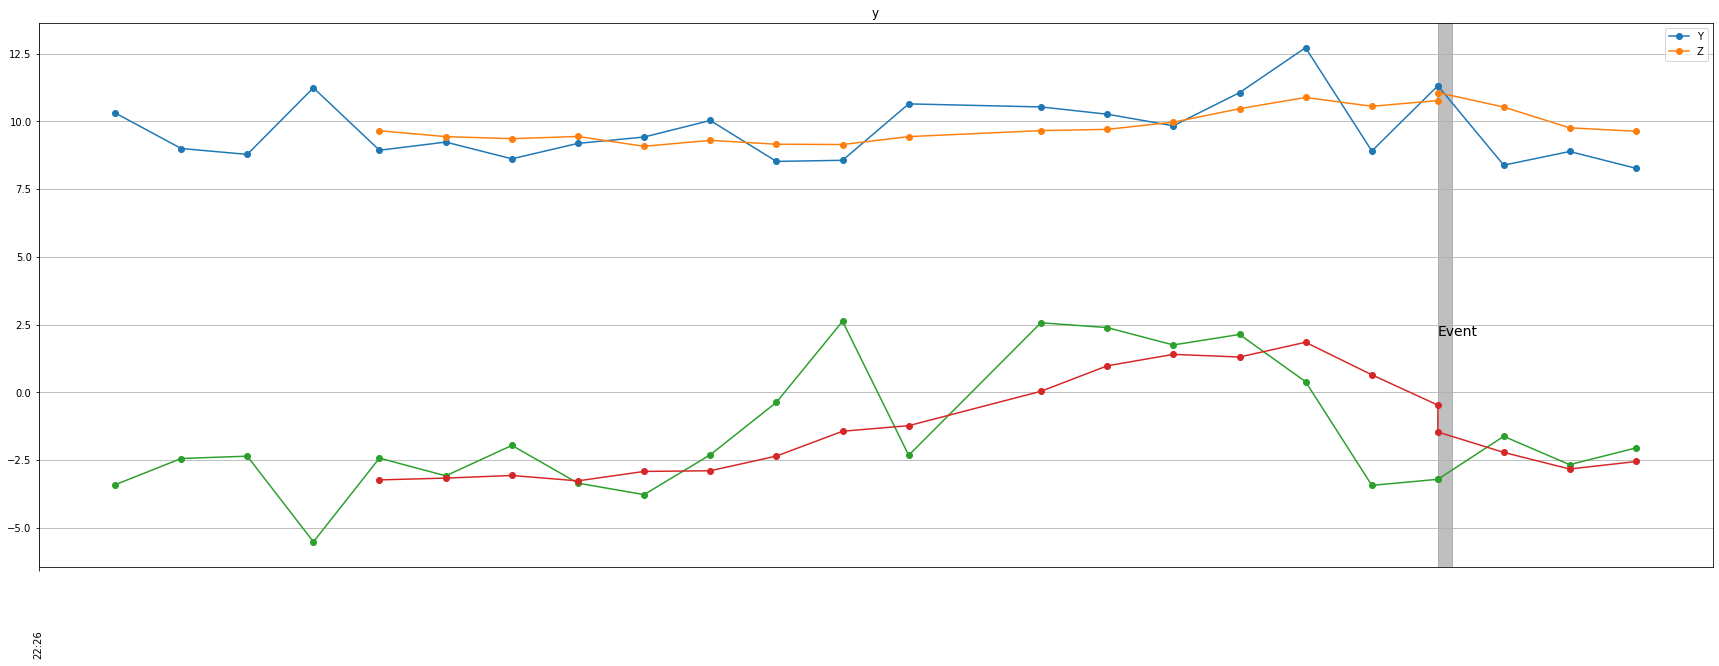

13052020222841
Shape: (40, 7)


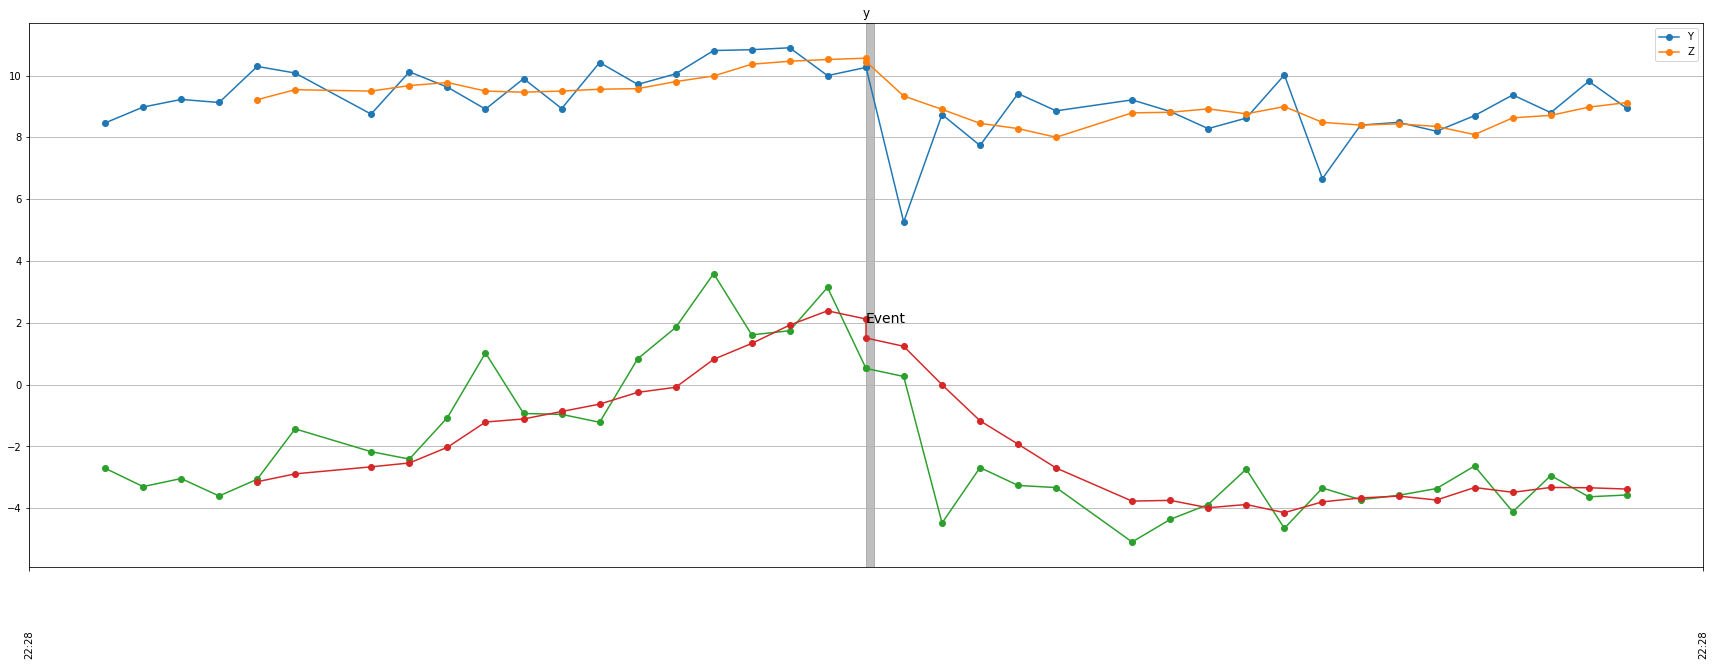

13052020222857
Shape: (45, 7)


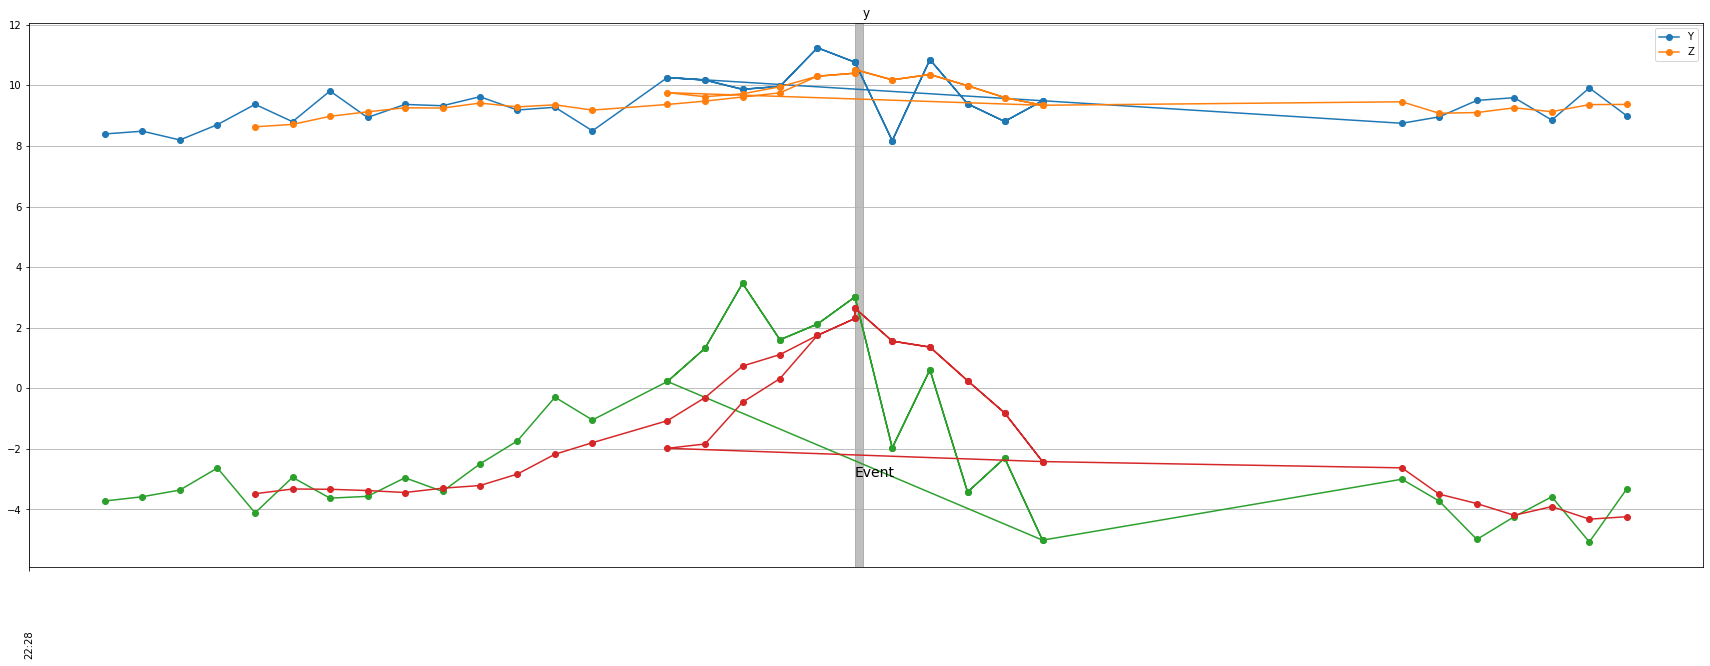

13052020222857
Shape: (45, 7)


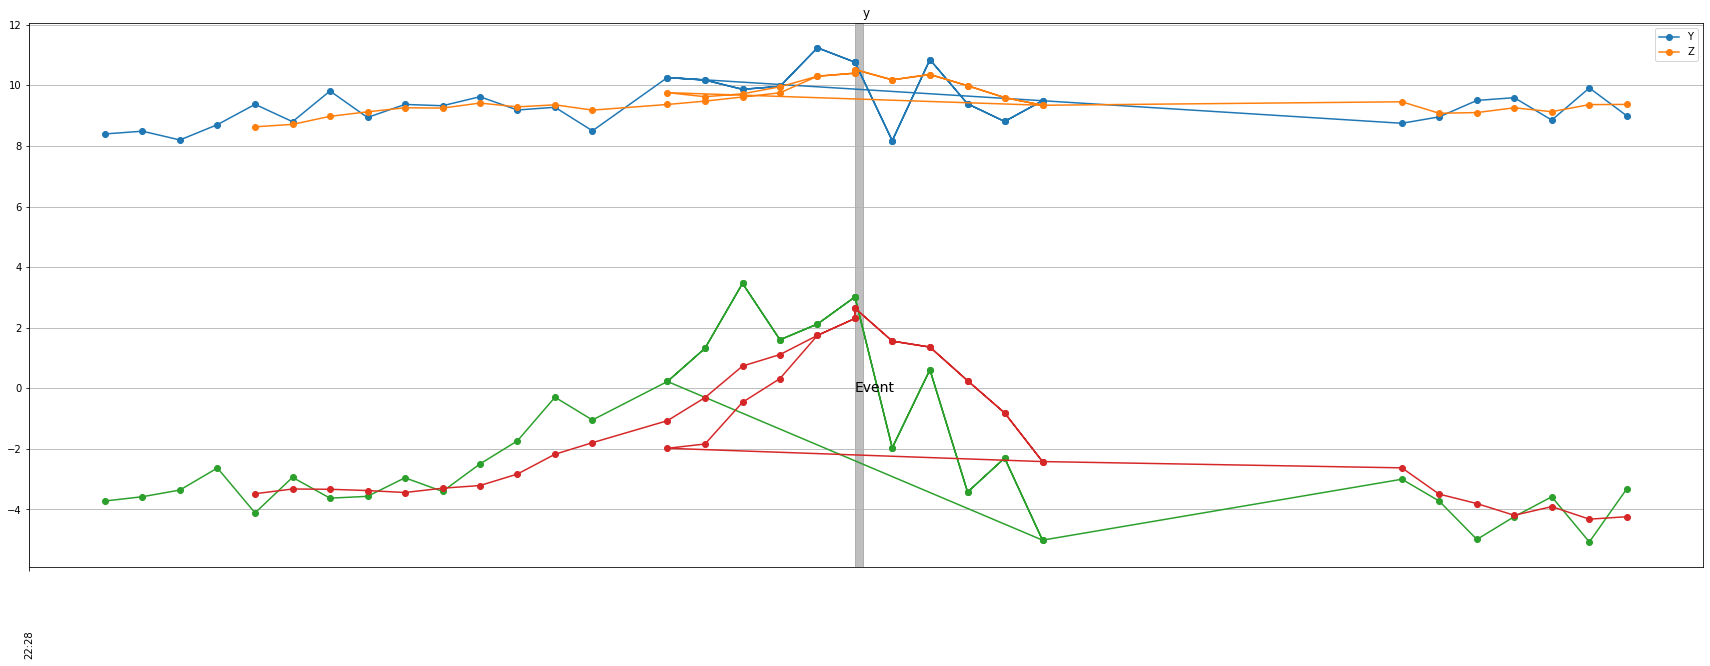

13052020222912
Shape: (36, 7)


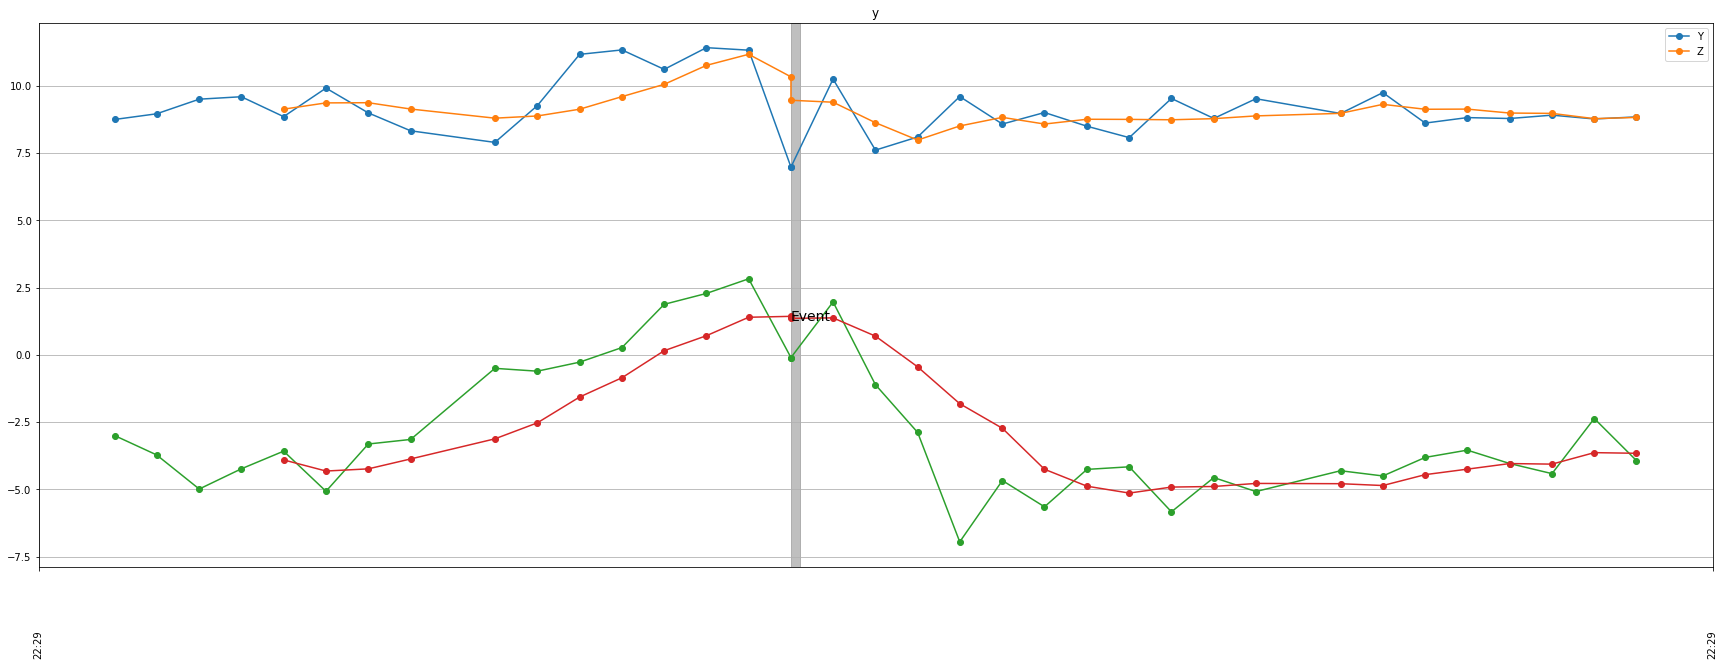

13052020222930
Shape: (45, 7)


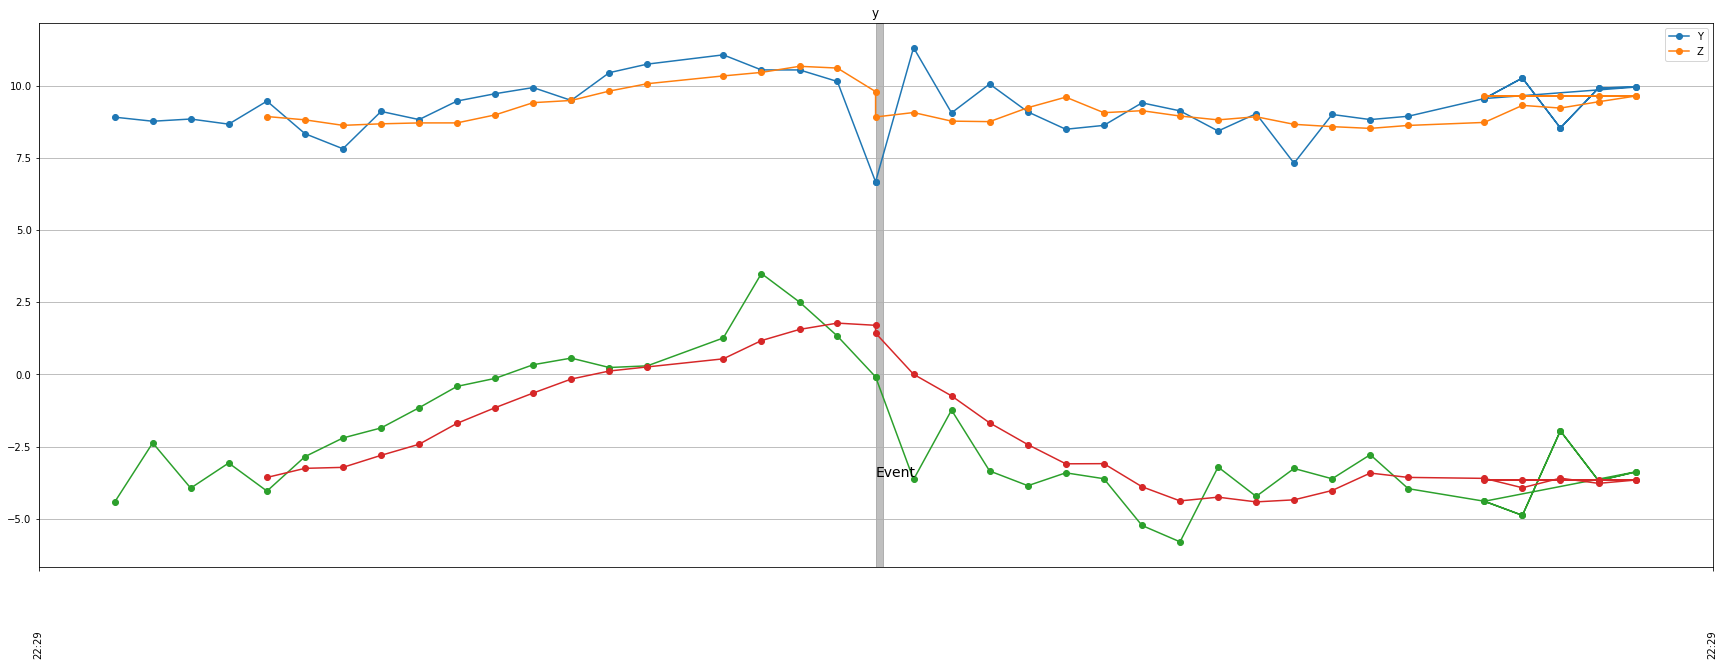

13052020223057
Shape: (38, 7)


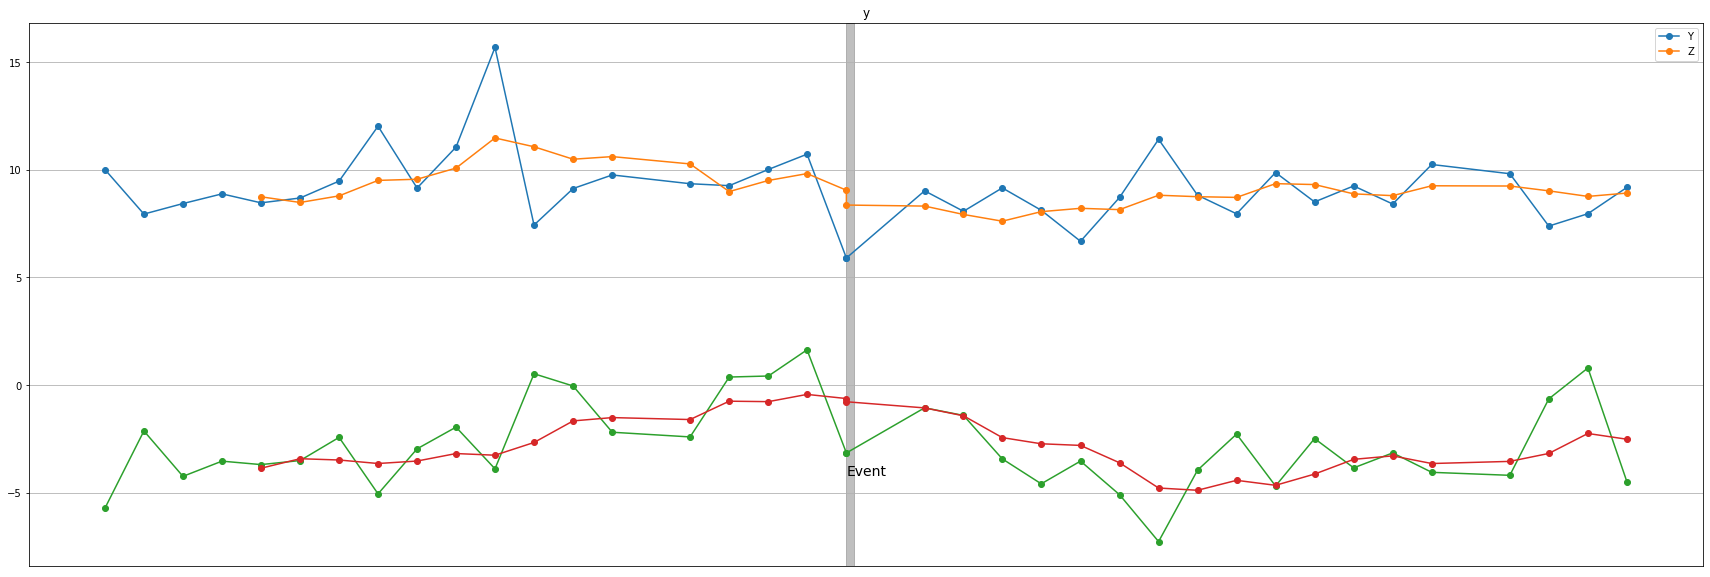

13052020223131
Shape: (43, 7)


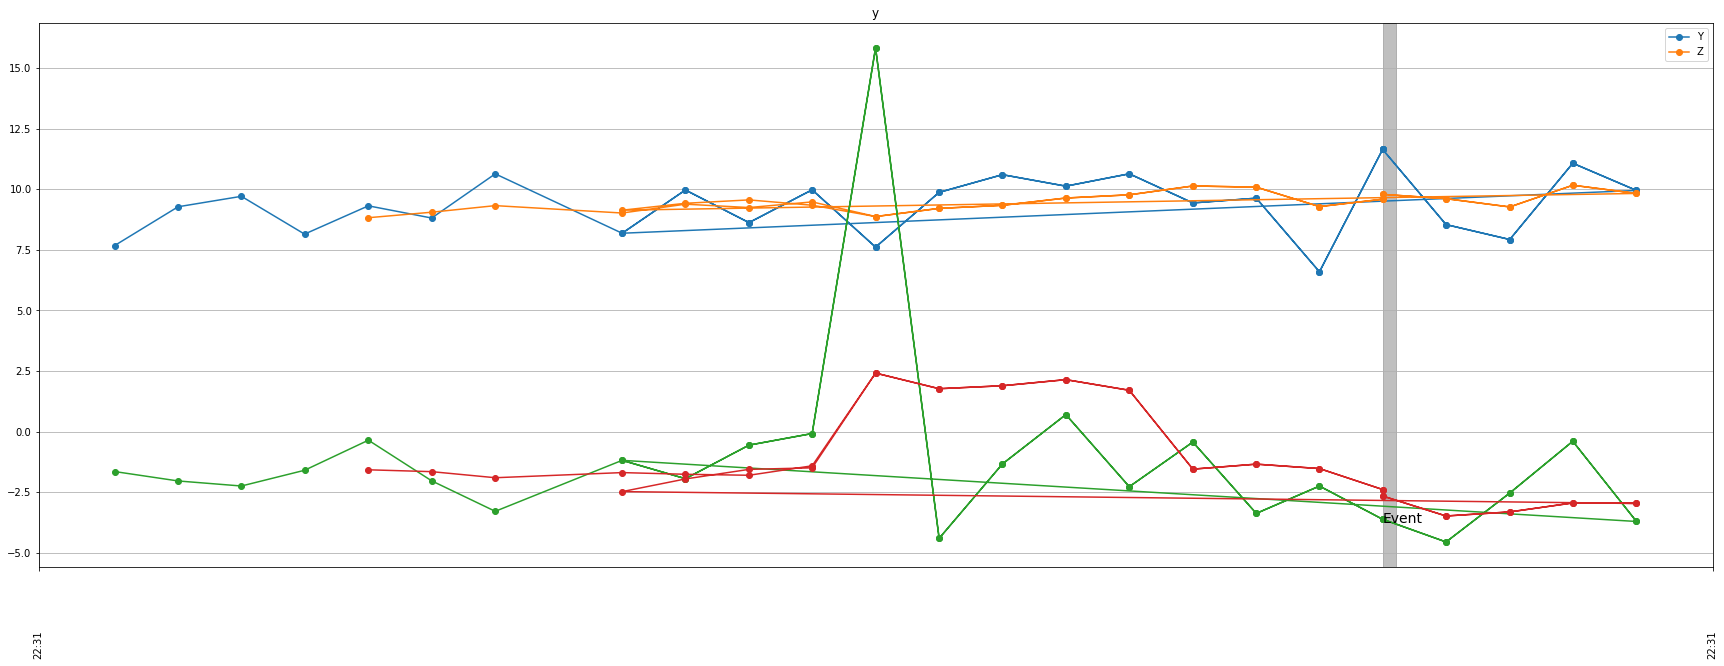

13052020223131
Shape: (43, 7)


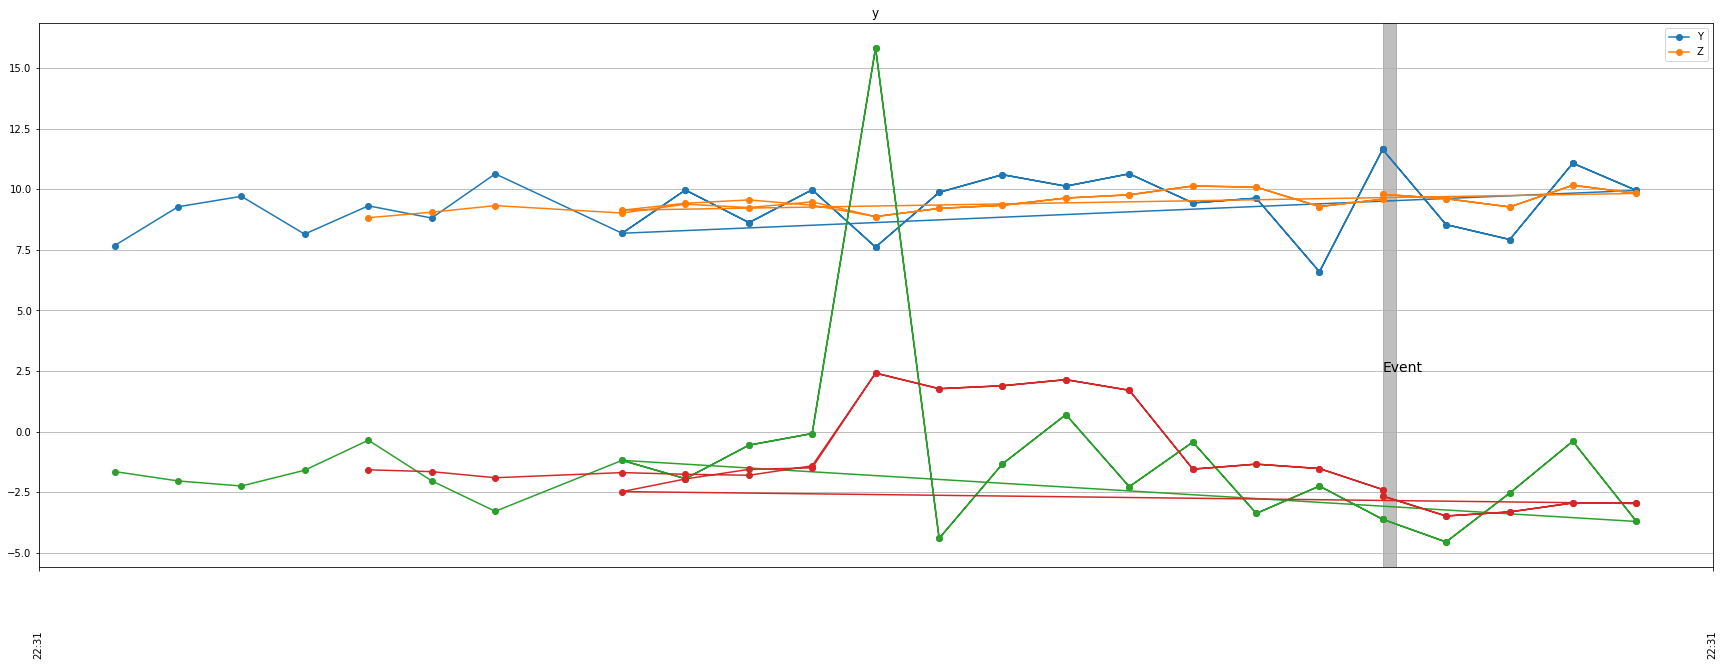

13052020223253
Shape: (39, 7)


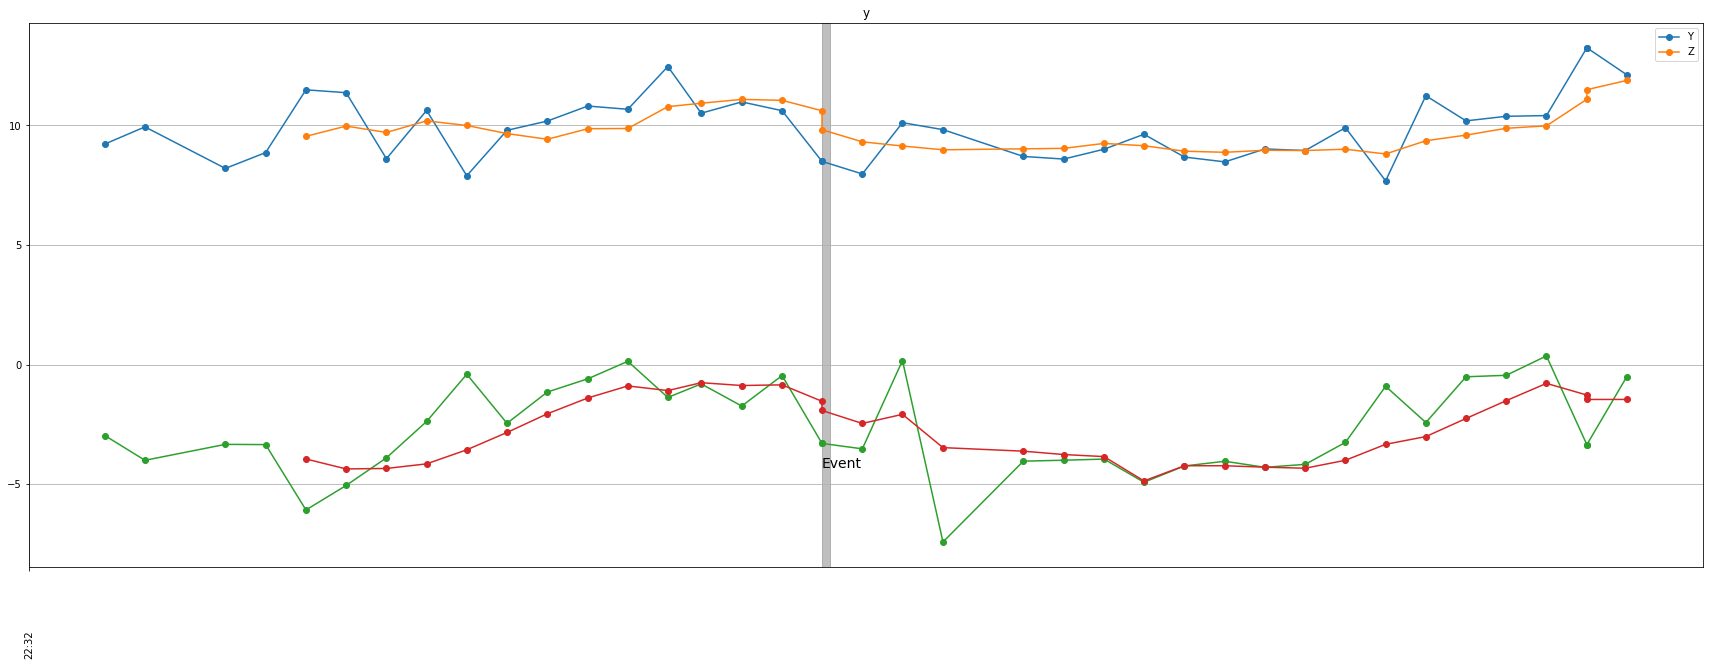

13052020223302
Shape: (41, 7)


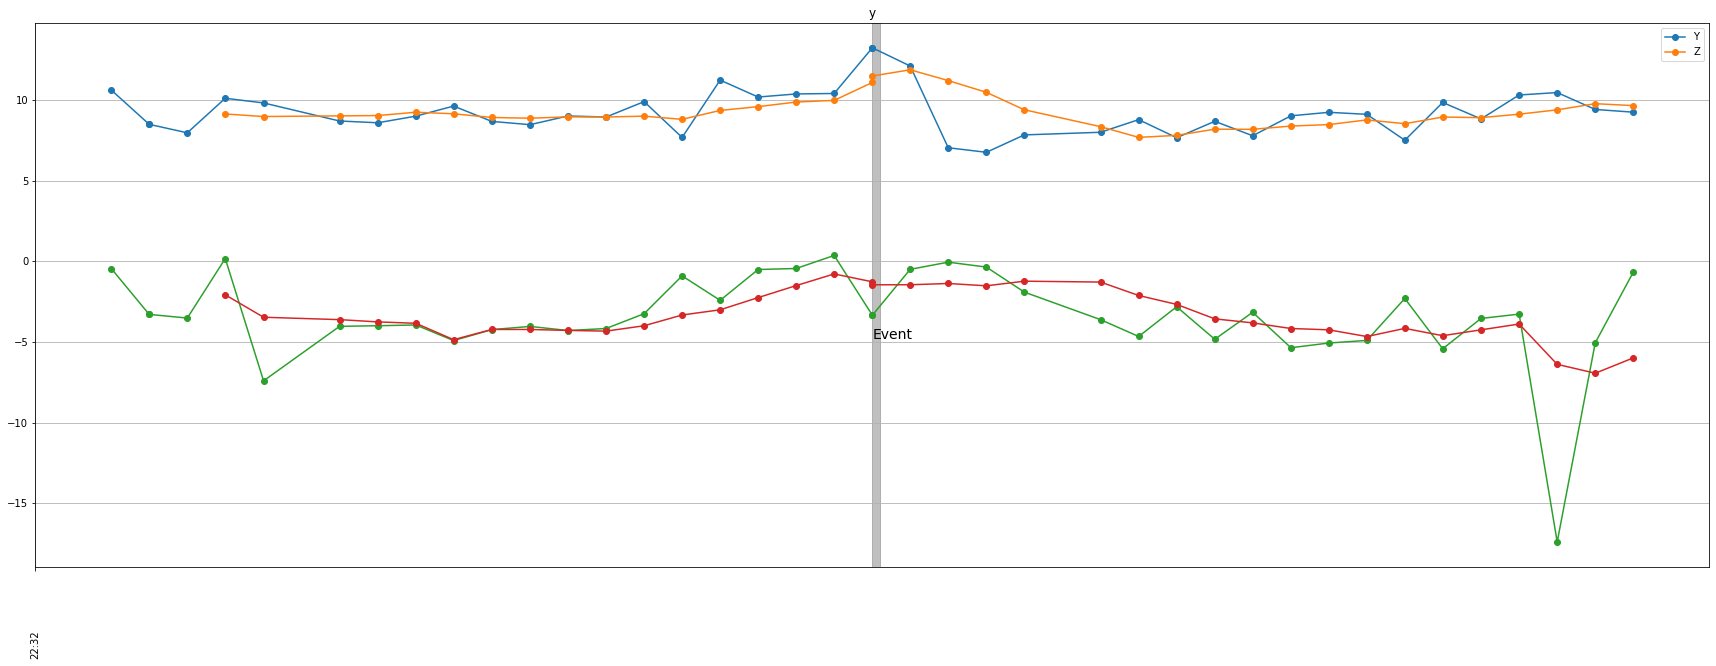

13052020223315
Shape: (47, 7)


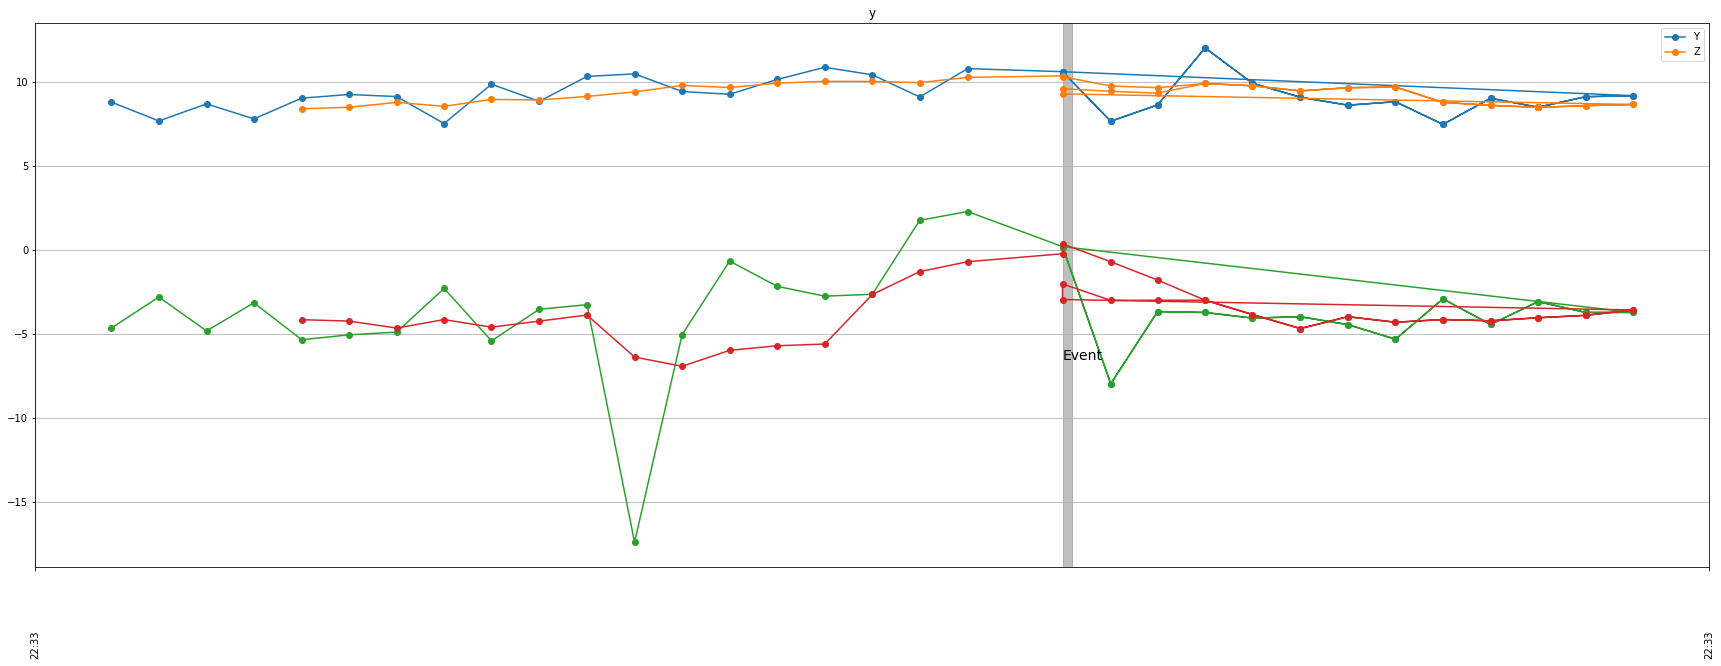

13052020223315
Shape: (47, 7)


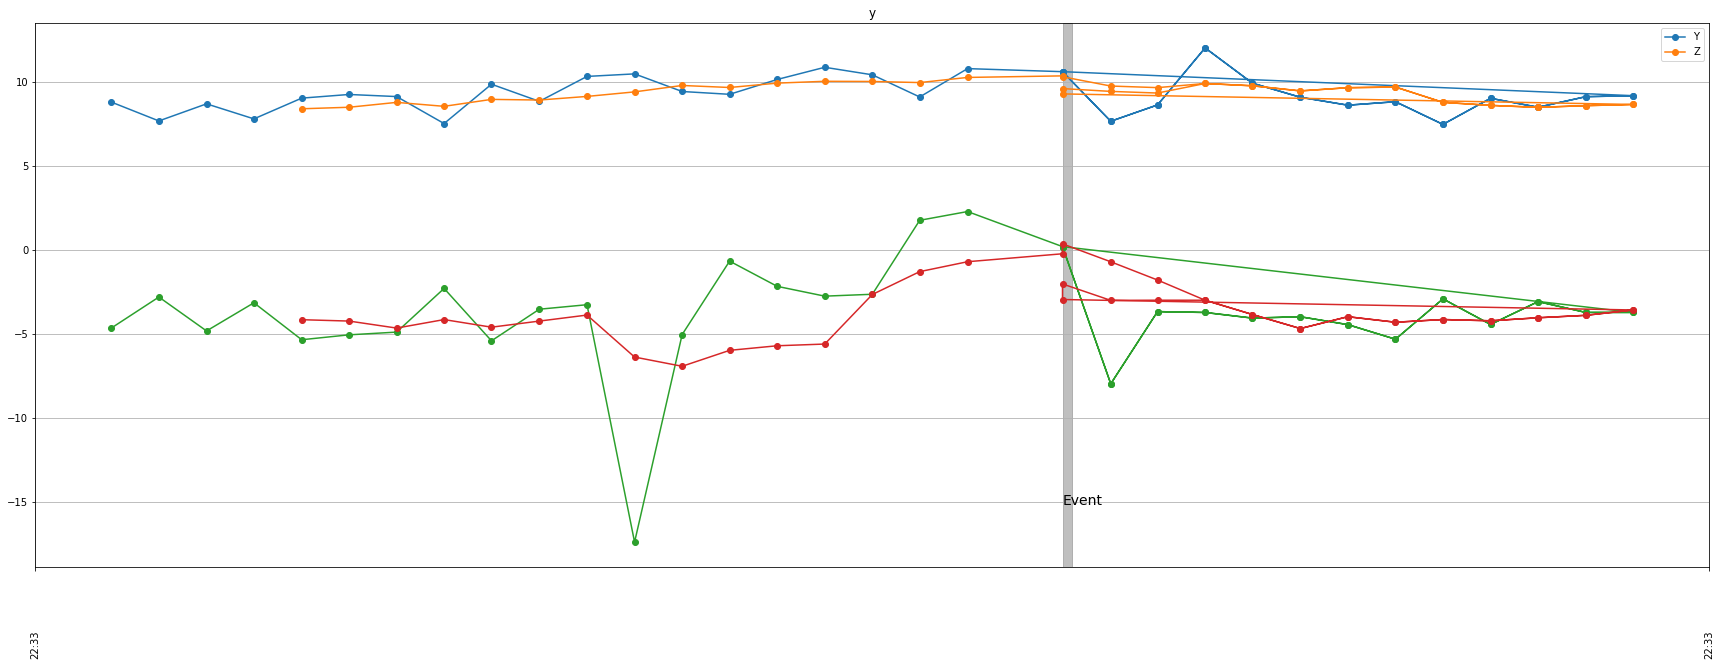

13052020223332
Shape: (28, 7)


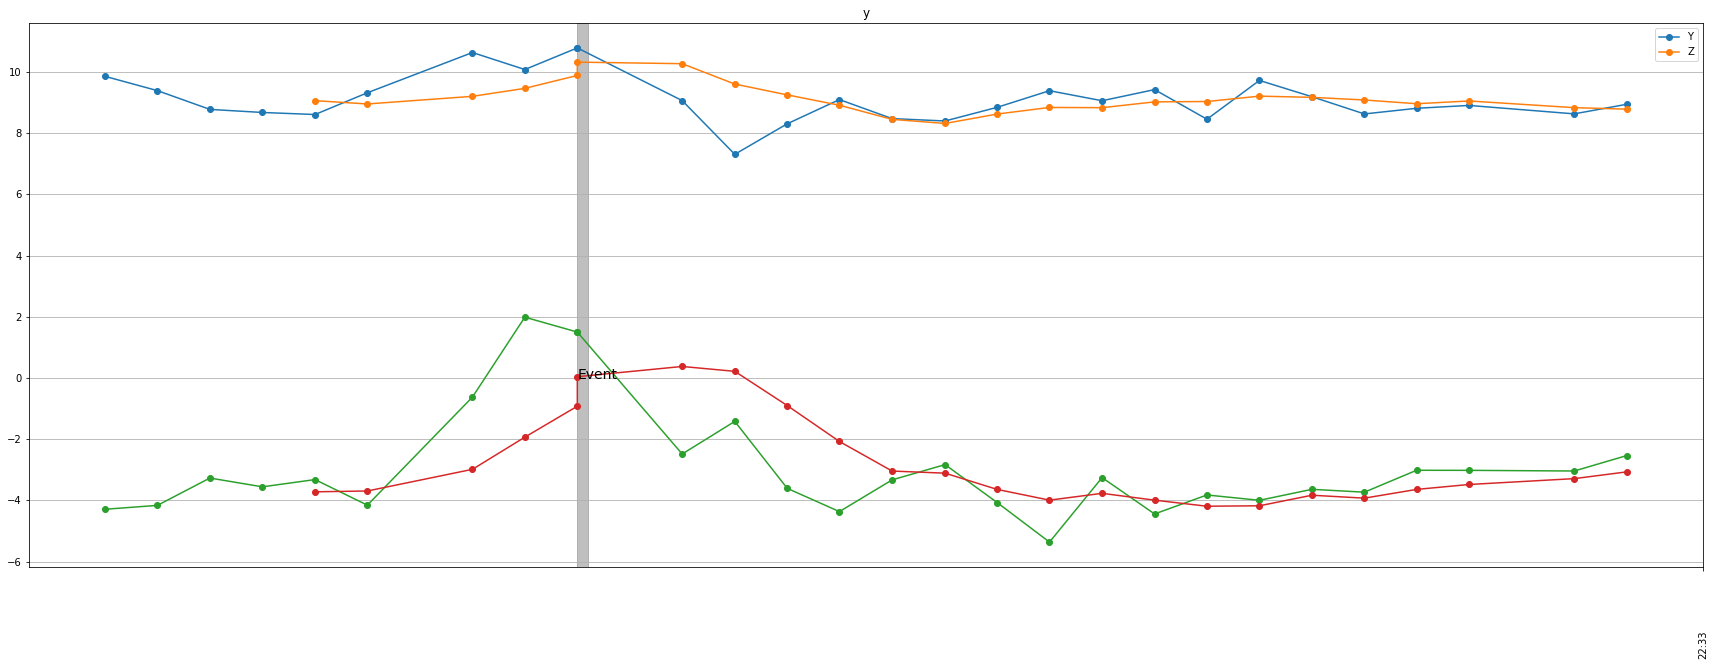

13052020223351
Shape: (45, 7)


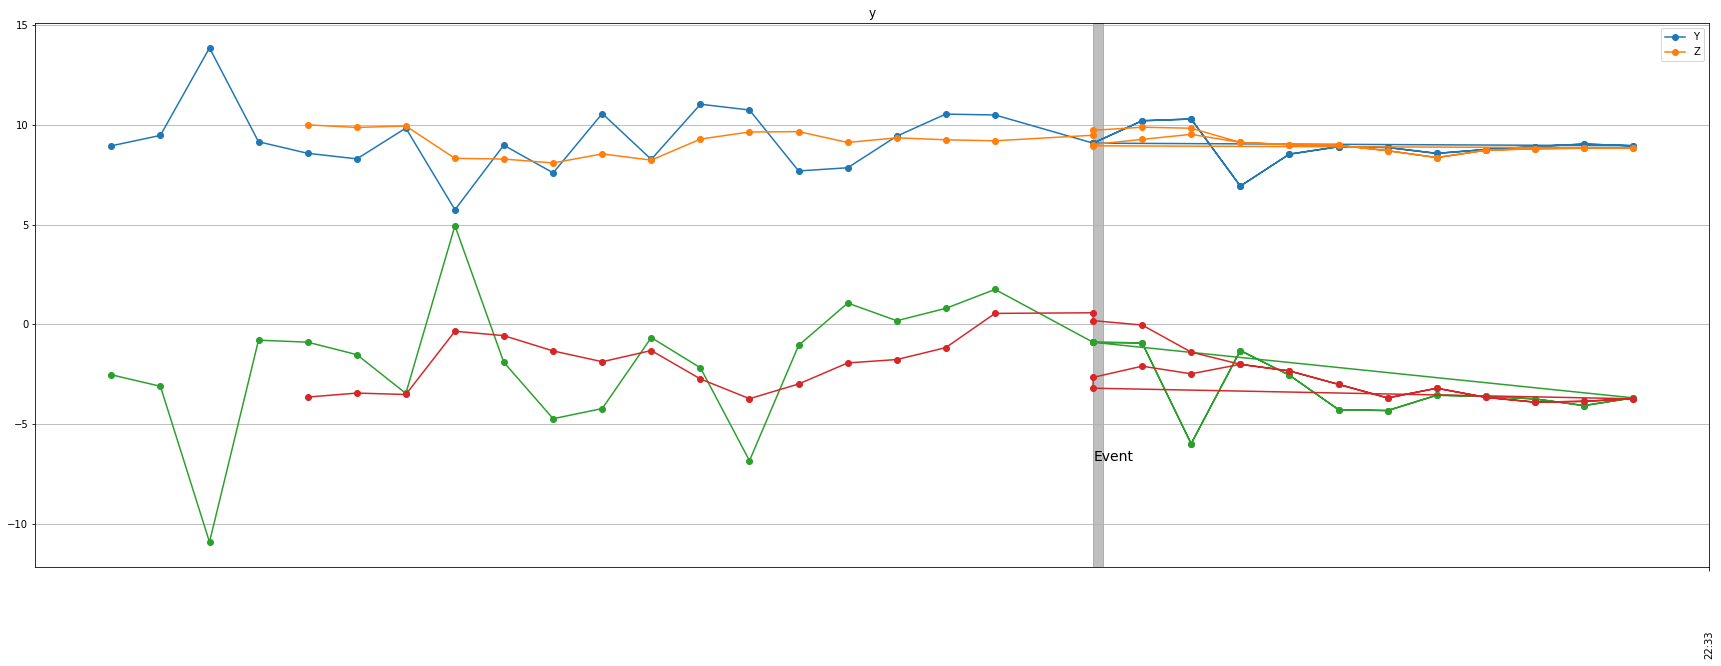

13052020223351
Shape: (45, 7)


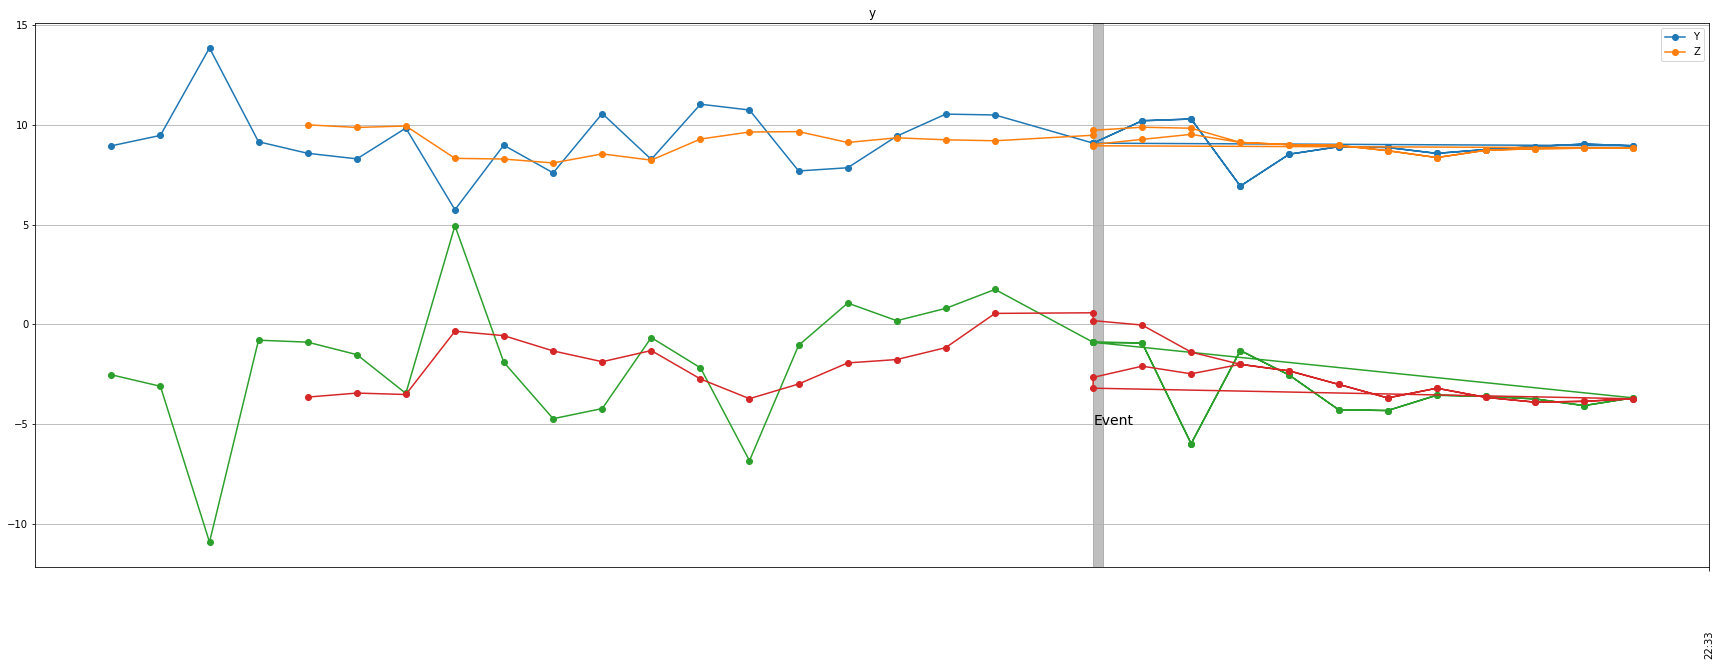

13052020223749
Shape: (40, 7)


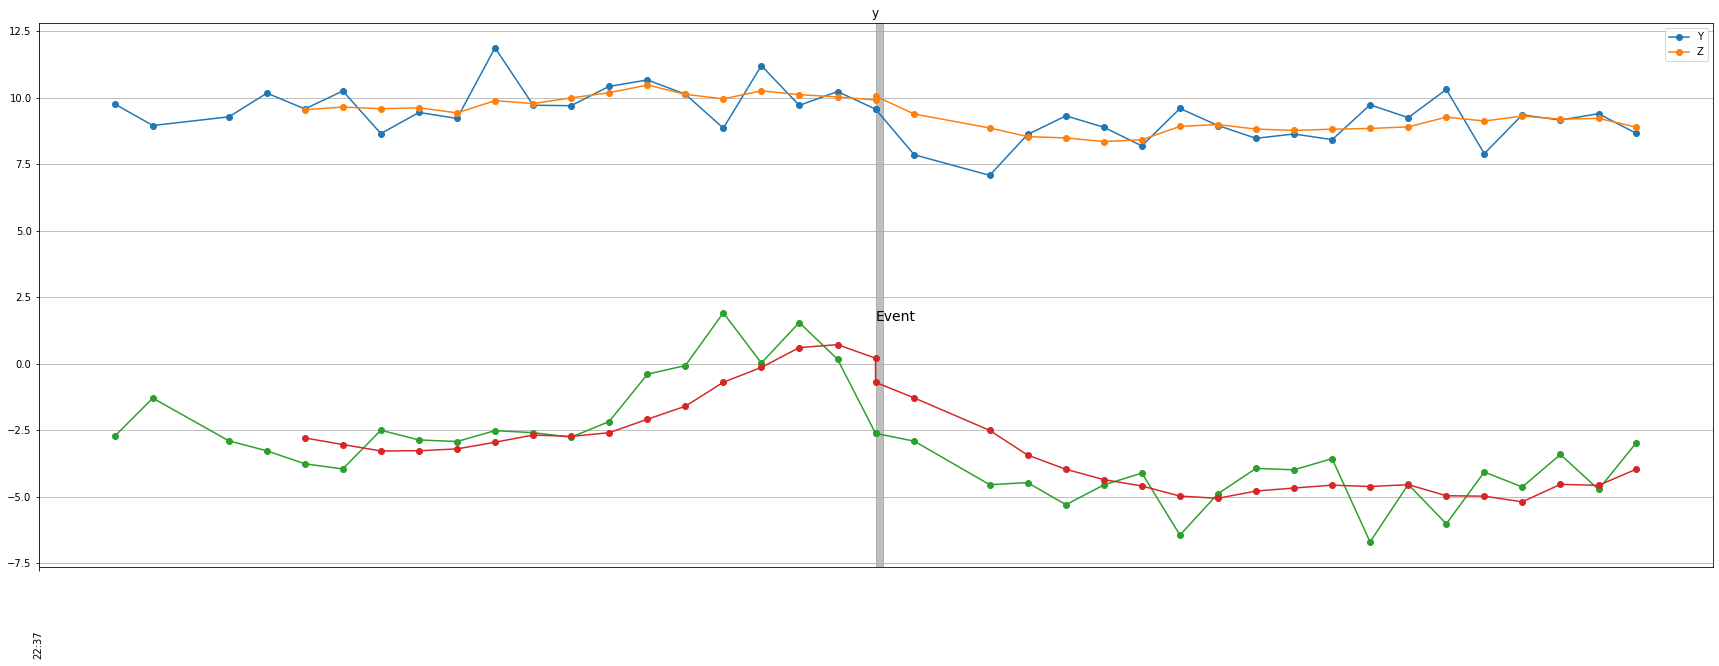

13052020223809
Shape: (39, 7)


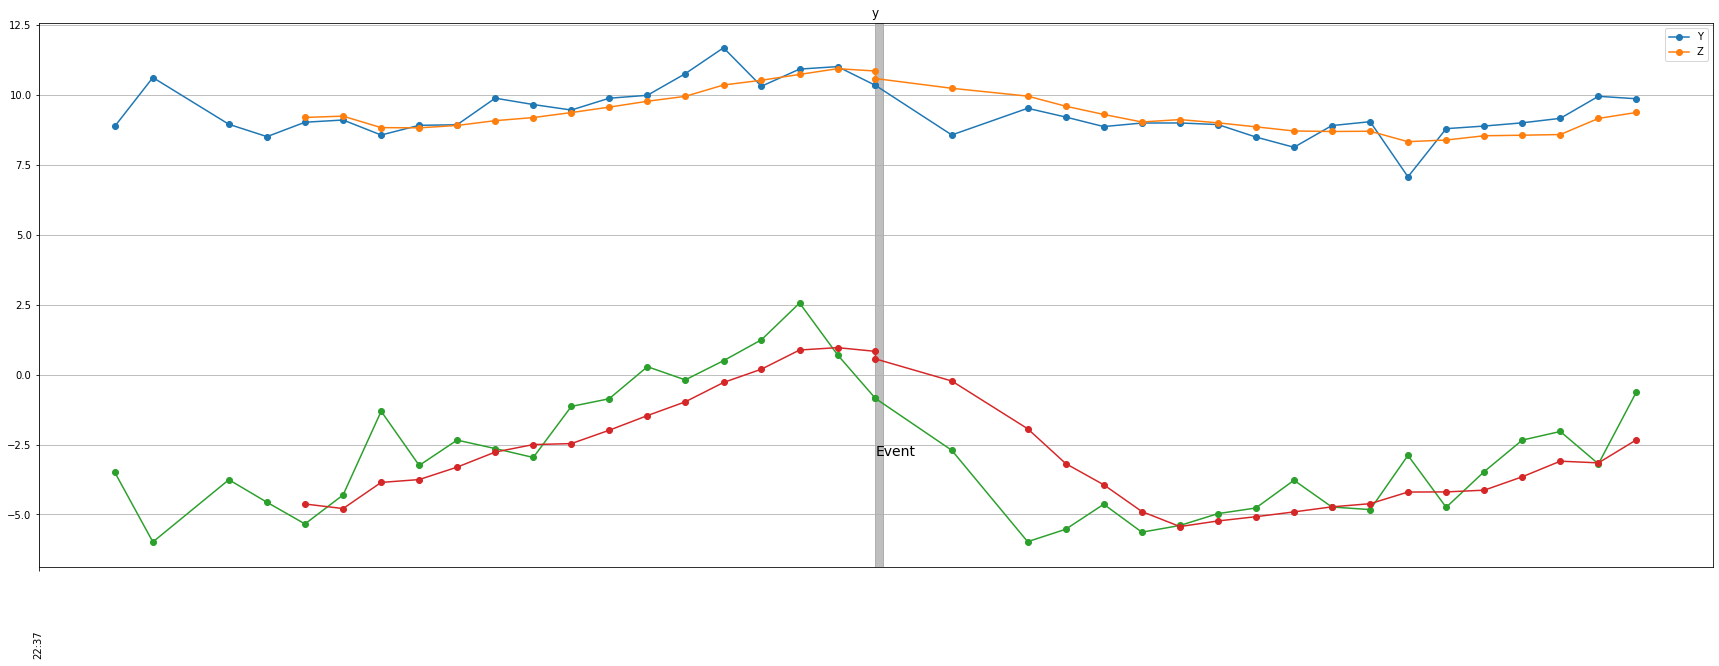

13052020223824
Shape: (25, 7)


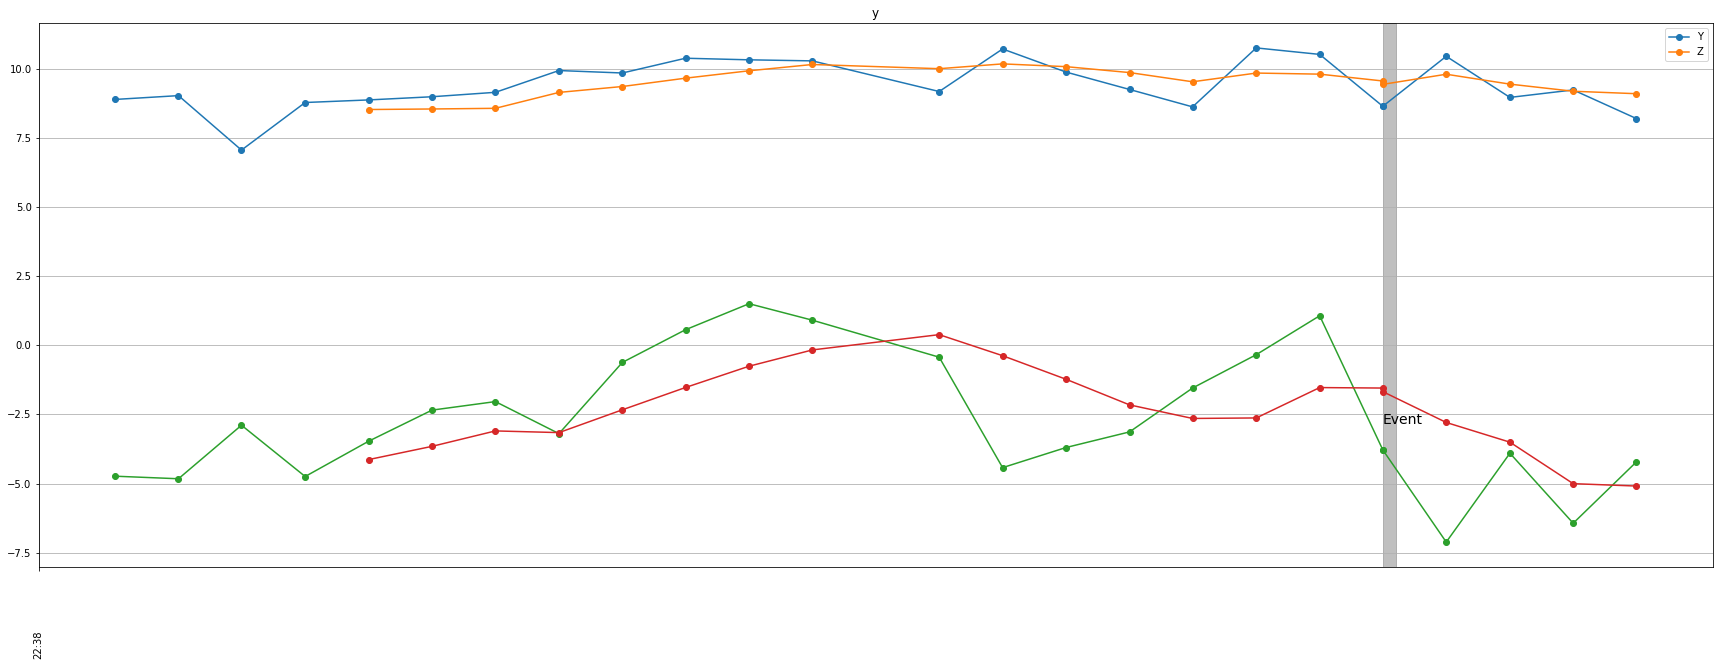

13052020223928
Shape: (38, 7)


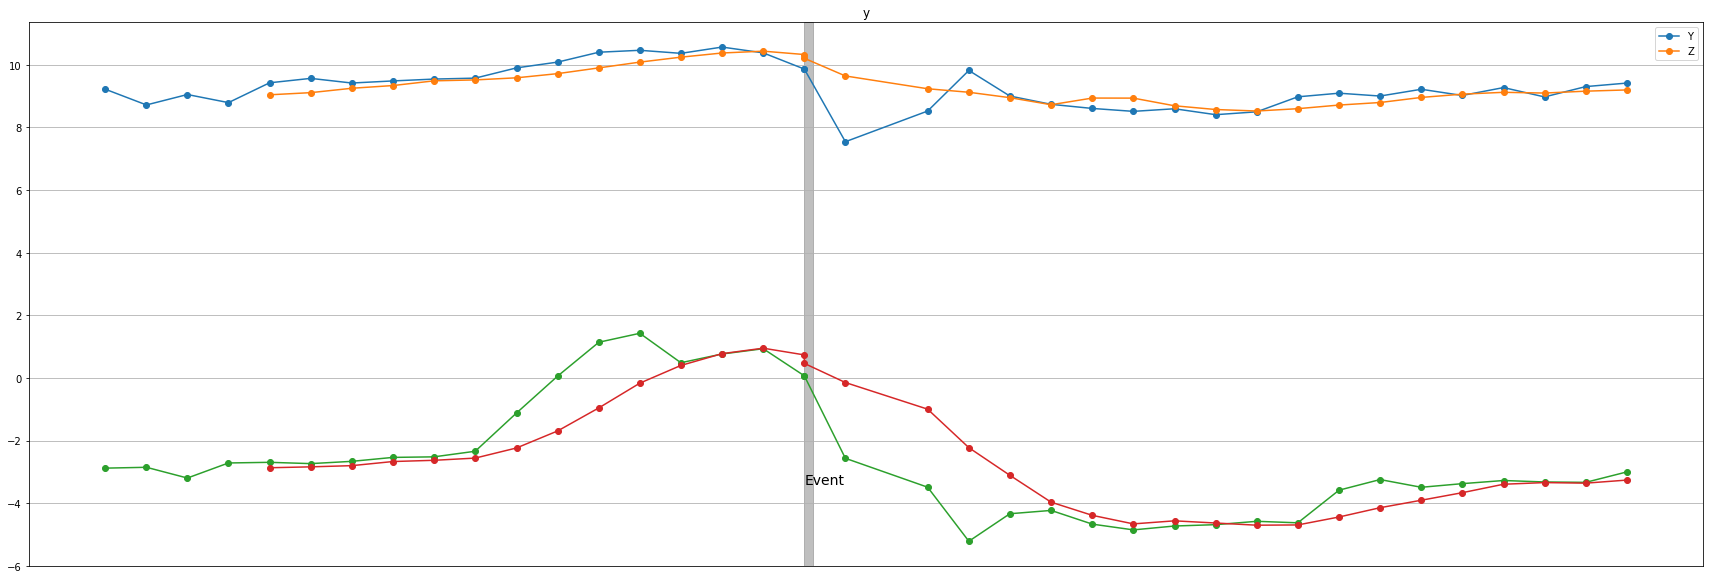

13052020223957
Shape: (41, 7)


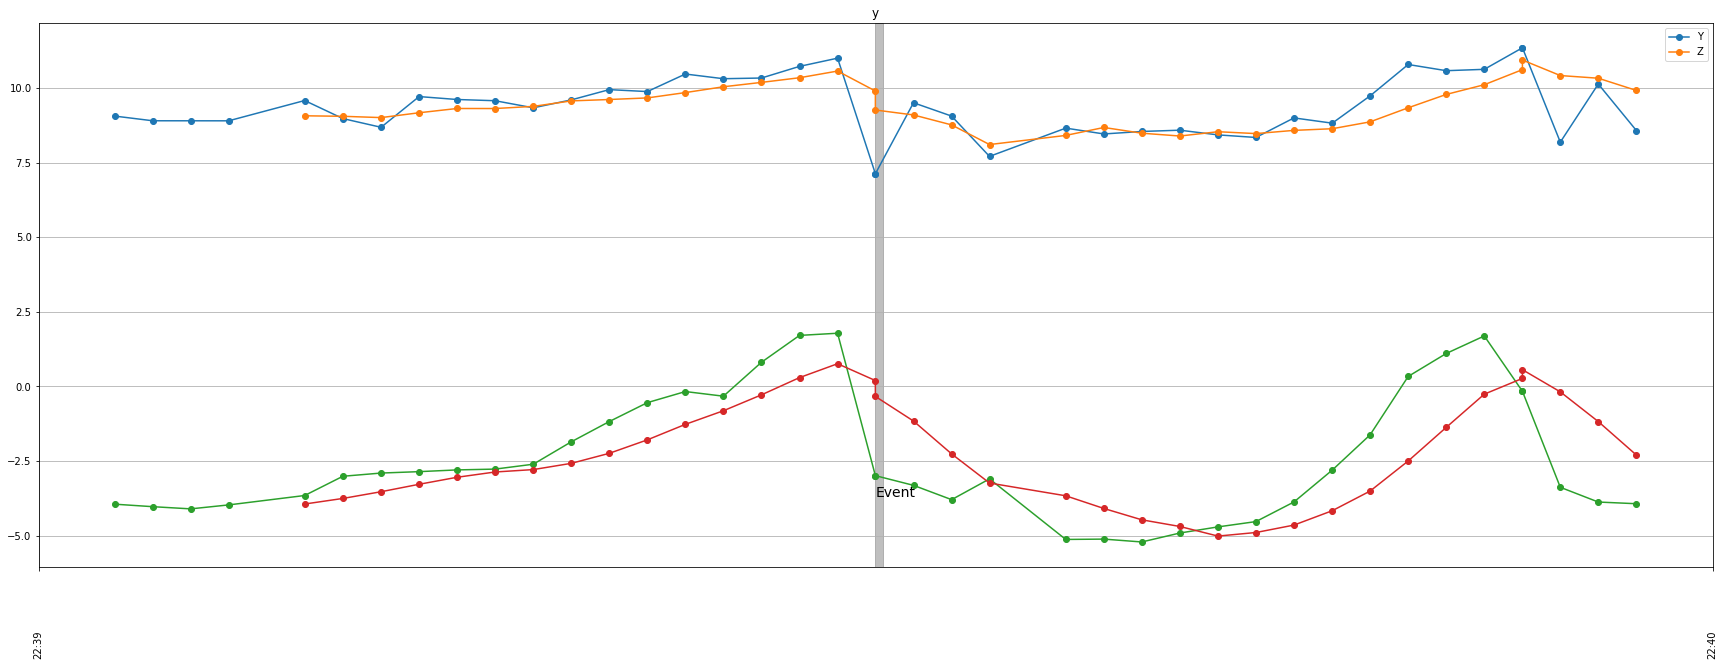

13052020224005
Shape: (25, 7)


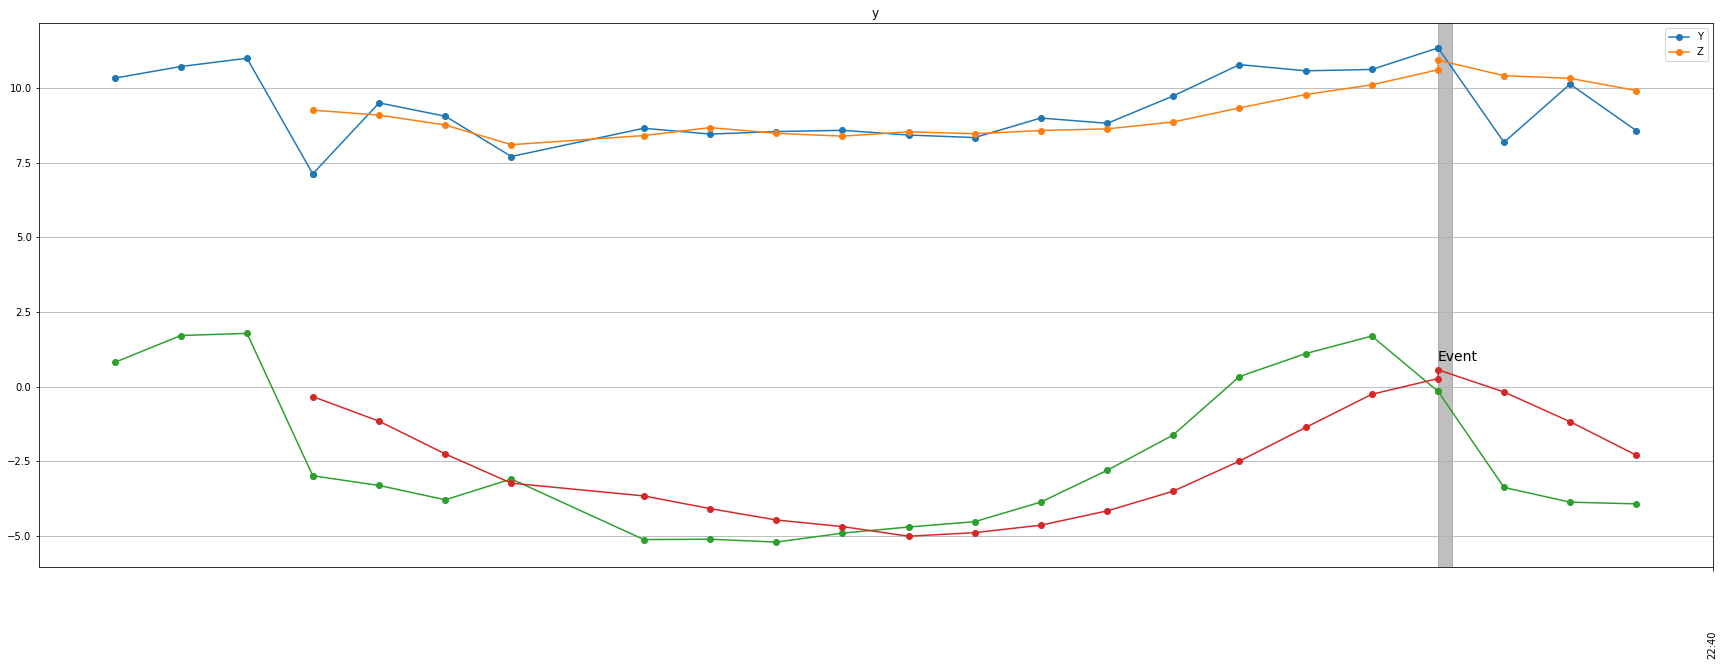

In [36]:
for special_date in special_dates:
    date_to_filename = special_date['event_time'].replace(' ', '').replace('/','').replace(':','').split('.')[0]
    print(date_to_filename)
    #save_figure_name='analise_'+date_to_filename+'.png'
    plot_manipulator.plot_timeseries(df_filtered,['y','z'],special_date['start_date'], special_date['end_date'], special_dates={special_date['event_time']:'Event'}, legend=['Y','Z'])